# **1. Introduction**

Dalam tahun 42069, krisis lingkungan menghantui kota Wiliwilowilev dengan tingginya emisi CO2 dan kualitas udara yang merugikan kesehatan penduduk. Sebagai respons terhadap situasi darurat ini, pemerintah Wiliwilowilev telah menugaskan tim data science Anda sebagai pemimpin proyek Clean Air Initiative. Tim Anda diberikan akses ke dataset besar yang mencakup emisi CO2 dari berbagai sumber dan sektor di kota, yang telah dikumpulkan oleh sejumlah freelancer.

Tujuan utama tim adalah melakukan analisis mendalam terhadap data ini untuk mengidentifikasi merek mobil yang berkontribusi pada tingginya emisi CO2. Dengan fokus pada solusi dan strategi, pemerintah berharap agar tim dapat memberikan rekomendasi yang konkret untuk mengurangi emisi CO2 dan meningkatkan kualitas udara di Wiliwilowilev. Situasi yang darurat memaksa tim Anda untuk bekerja dengan cepat, dan setiap harinya menjadi krusial untuk memberikan solusi yang dapat diimplementasikan secepat mungkin.

Tantangan ini tidak hanya menuntut keterampilan analisis data tingkat tinggi, tetapi juga membutuhkan kreativitas dalam merancang solusi yang efektif. Kesuksesan tim Anda dalam proyek ini akan memiliki dampak besar terhadap kesehatan dan kesejahteraan penduduk Wiliwilowilev serta memainkan peran kunci dalam upaya global untuk mengatasi krisis lingkungan.


# **2. Data Collection**

### 2.1 Implementasi Data Collection
Load Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable
from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Dataset

In [2]:
data = pd.read_csv('Dataset/train.csv')
data

Id     Make            Vehicle Class Engine Size(L) Cylinders  \
0          1    MITSU              SUV - SMALL            1.5       4.0   
1          2   TOYOTI     PICKUP TRUCK - SMALL  not-available       6.0   
2          3  MATSUDA                  COMPACT            2.0       4.0   
3          4    CHEVO          VAN - PASSENGER        unknown       8.0   
4          5   TOYOTI                  COMPACT            1.8       4.0   
...      ...      ...                      ...            ...       ...   
54932  54933    CHEVO               SUBCOMPACT            6.2       8.0   
54933  54934    CHEVO               SUBCOMPACT            3.6       6.0   
54934  54935     FOLD               TWO-SEATER            3.5       6.0   
54935  54936    CHEVO  PICKUP TRUCK - STANDARD            6.2       8.0   
54936  54937  RYUNDAI                FULL-SIZE            2.4       4.0   

      Transmission Fuel Type Fuel Consumption City     Fuel Consumption Hwy  \
0              AV8         X             8.40 km/L              0.72 L/10km   
1               A5         X         7.25 km per L             9.70 L/100km   
2              AS6         X             9.80 km/L           38.70 mpg Imp.   
3               A6         X           1.73 L/10km  11.70 liters per 100 km   
4               M6         X          8.10 L/100km           35.76 mpg Imp.   
...            ...       ...                   ...                      ...   
54932         AS10         Z         11.90 L/100km           11.36 km per L   
54933           M6         X           2.10 L/10km              1.06 L/10km   
54934          AM7         Z         18.20 L/100km            12.50 L/100km   
54935           A8         Z        18.30 L/100 km   9.90 liters per 100 km   
54936          AS6         X         9.70 L/100 km           32.22 MPG (AS)   

         Fuel Consumption Comb  CO2 Emissions(g/km)  
0                  0.98 L/10km                  208  
1                11.96 L/100km                  325  
2               31.76 mpg Imp.                  170  
3      14.78 liters per 100 km                  362  
4       8.01 liters per 100 km                  180  
...                        ...                  ...  
54932           22.39 MPG (AS)                  318  
54933           14.41 MPG (AS)                  303  
54934           15.63 L/100 km                  410  
54935           14.52 L/100 km                  466  
54936            not-available                  192  

[54937 rows x 11 columns]

Deskripsi Dataset:

- **Make**, Produsen Kendaraan
- **Vehicle Class**, Klasifikasi Kendaraan
- **Engine Size(L)**, Kapasitas Mesin (dalam liter)
- **Cylinders**, Jumlah Silinder
- **Transmission**, Jenis Transmisi:
1. A = Otomatis
2. AM = Manual Otomatis
3. AS = Otomatis dengan Perpindahan Gigi Pilihan
4. AV = Variabel Berkesinambungan
5. M = Manual
- **Fuel Type**, Jenis Bahan Bakar:
1. X = Bensin Biasa
2. Z = Bensin Premium
3. D = Diesel
4. E = Etanol (E85)
5. N = Gas Alam
- **Fuel Consumption City**, Konsumsi Bahan Bakar selama Kondisi Mengemudi dalam Kota
- **Fuel Consumption Hwy**, Konsumsi Bahan Bakar selama Kondisi Mengemudi di Jalan Raya
- **Fuel Consumption Comb**, Peringkat Konsumsi Bahan Bakar Gabungan (55% Kota, 45% Jalan Raya)
- **CO2 Emissions(g/km)**, Emisi Gas Karbon Dioksida yang dihasilkan

# **3. EDA** 

**Analisis Data Eksplorasi (EDA)** adalah salah satu teknik yang digunakan untuk mengekstraksi fitur dan tren vital yang digunakan oleh pembelajaran mesin dan model pembelajaran mendalam dalam Sains Data. Memahami data secara menyeluruh membutuhkan eksplorasi dari setiap aspek. Fitur yang berdampak memungkinkan pengambilan keputusan yang bermakna dan bermanfaat; oleh karena itu, EDA menempati tempat yang tak ternilai dalam Sains Data.

**Types of Exploratory Data Analysis**

1. Univariate
2. Bivariate
3. Multivariate


### Data Transfromation

In [3]:
def convert_to_l_per_100km(value):
    value_str = str(value)
    pattern = r"(\d+\.\d+)\s(.+)"
    match = re.match(pattern, value_str)
    
    if match:
        numeric_value = float(match.group(1))
        unit_type = match.group(2).lower()

        if unit_type in ["liters per 100 km", "l/100 km", "l/100km"]:
            return round(numeric_value, 2)
        elif unit_type == "l/10km":
            return round(numeric_value * 10, 2)
        elif unit_type in ["km per l", "km/l"]:
            return round(100 / numeric_value, 2)
        elif unit_type == "mpg (as)":
            return round(235.21 / numeric_value, 2)
        elif unit_type == "mpg imp.":
            return round(282.48 / numeric_value, 2)
        else:
            return None
    else:
        return None

Menaruh Data dalam Data yang sama

In [4]:
data_eda = data
data_eda['Fuel Consumption City'] = data['Fuel Consumption City'].apply(convert_to_l_per_100km)
data_eda['Fuel Consumption Hwy'] = data['Fuel Consumption Hwy'].apply(convert_to_l_per_100km)
data_eda['Fuel Consumption Comb'] = data['Fuel Consumption Comb'].apply(convert_to_l_per_100km)


Merubah Missing Values dengan **Nan**

In [5]:
missing_values = ['nan', 'unspecified', 'missing', 'not-recorded', '-1', 'unknown', 'unestablished', 'na', 'not-available', 'zero']
for column in data.columns:
    data_eda[column].replace(missing_values, np.nan, inplace=True)

Melihat jumlah Data **Nan** pada setiap features dan Jumlah data

In [6]:
nan_counts = data_eda.isna().sum()
print(nan_counts)
print(data_eda.shape)
data_eda.head(10)

Id                          0
Make                        0
Vehicle Class            2051
Engine Size(L)           5264
Cylinders                4523
Transmission             1483
Fuel Type                1942
Fuel Consumption City    2325
Fuel Consumption Hwy     2563
Fuel Consumption Comb    2552
CO2 Emissions(g/km)         0
dtype: int64
(54937, 11)


Id     Make         Vehicle Class Engine Size(L) Cylinders Transmission  \
0   1    MITSU           SUV - SMALL            1.5       4.0          AV8   
1   2   TOYOTI  PICKUP TRUCK - SMALL            NaN       6.0           A5   
2   3  MATSUDA               COMPACT            2.0       4.0          AS6   
3   4    CHEVO       VAN - PASSENGER            NaN       8.0           A6   
4   5   TOYOTI               COMPACT            1.8       4.0           M6   
5   6     DOGE              MID-SIZE            2.4       4.0           A6   
6   7      BMV               COMPACT            2.0       NaN           M6   
7   8    LECUS              MID-SIZE            3.5       6.0          AS6   
8   9      KIO           SUV - SMALL            2.4       4.0          AS6   
9  10   TOYOTI  PICKUP TRUCK - SMALL            2.7       4.0           M5   

  Fuel Type  Fuel Consumption City  Fuel Consumption Hwy  \
0         X                  11.90                   7.2   
1         X                  13.79                   9.7   
2         X                  10.20                   7.3   
3         X                  17.30                  11.7   
4         X                   8.10                   7.9   
5         X                  11.30                   8.0   
6         Z                    NaN                   8.1   
7         X                  12.00                   9.9   
8         X                  13.90                   NaN   
9         X                  13.11                   8.9   

   Fuel Consumption Comb  CO2 Emissions(g/km)  
0                   9.80                  208  
1                  11.96                  325  
2                   8.89                  170  
3                  14.78                  362  
4                   8.01                  180  
5                   9.81                  216  
6                   8.59                  201  
7                  11.05                  221  
8                    NaN                  243  
9                    NaN                  297

Merubah tipe Data

In [7]:
data_eda['Engine Size(L)'] = data_eda['Engine Size(L)'].astype(float)
data_eda['Cylinders'] = data_eda['Cylinders'].astype(float)

In [8]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     54937 non-null  int64  
 1   Make                   54937 non-null  object 
 2   Vehicle Class          52886 non-null  object 
 3   Engine Size(L)         49673 non-null  float64
 4   Cylinders              50414 non-null  float64
 5   Transmission           53454 non-null  object 
 6   Fuel Type              52995 non-null  object 
 7   Fuel Consumption City  52612 non-null  float64
 8   Fuel Consumption Hwy   52374 non-null  float64
 9   Fuel Consumption Comb  52385 non-null  float64
 10  CO2 Emissions(g/km)    54937 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 4.6+ MB


<div style="background-color: #00ff00">IDENTIFIKASI POLA</div>

### 3.1 Univariate
Deskripsi Statistik Data Numeric

In [9]:
data_eda.describe()

Id  Engine Size(L)     Cylinders  Fuel Consumption City  \
count  54937.000000    49673.000000  50414.000000           52612.000000   
mean   27469.000000        2.978387      5.292379              12.554607   
std    15859.090206        1.303561      1.600217               3.856968   
min        1.000000        1.000000      3.000000               4.200000   
25%    13735.000000        2.000000      4.000000               9.900000   
50%    27469.000000        2.500000      4.000000              11.700000   
75%    41203.000000        3.600000      6.000000              15.110000   
max    54937.000000        8.400000     12.000000              30.500000   

       Fuel Consumption Hwy  Fuel Consumption Comb  CO2 Emissions(g/km)  
count          52374.000000           52385.000000         54937.000000  
mean               9.144992              11.023315           246.688680  
std                2.344693               2.974409            67.571095  
min                4.000000               4.380000            96.000000  
25%                7.500000               8.880000           197.000000  
50%                8.600000              10.320000           233.000000  
75%               10.400000              13.000000           290.000000  
max               20.500000              25.320000           522.000000

In [10]:
data_eda.describe()

Id  Engine Size(L)     Cylinders  Fuel Consumption City  \
count  54937.000000    49673.000000  50414.000000           52612.000000   
mean   27469.000000        2.978387      5.292379              12.554607   
std    15859.090206        1.303561      1.600217               3.856968   
min        1.000000        1.000000      3.000000               4.200000   
25%    13735.000000        2.000000      4.000000               9.900000   
50%    27469.000000        2.500000      4.000000              11.700000   
75%    41203.000000        3.600000      6.000000              15.110000   
max    54937.000000        8.400000     12.000000              30.500000   

       Fuel Consumption Hwy  Fuel Consumption Comb  CO2 Emissions(g/km)  
count          52374.000000           52385.000000         54937.000000  
mean               9.144992              11.023315           246.688680  
std                2.344693               2.974409            67.571095  
min                4.000000               4.380000            96.000000  
25%                7.500000               8.880000           197.000000  
50%                8.600000              10.320000           233.000000  
75%               10.400000              13.000000           290.000000  
max               20.500000              25.320000           522.000000

Dari dataset yang diberikan, terlihat beberapa informasi dasar tentang kendaraan dan emisi CO2 di kota Wiliwilowilev. Berikut adalah beberapa analisis awal yang dapat dilakukan untuk membantu memahami data lebih lanjut:

1. **Engine Size(L)**
Kapasitas mesin rata-rata kendaraan di kota Wiliwilowilev adalah sekitar 2.9 liter, dengan variasi yang signifikan dari 1 hingga 8.4 liter. Standar deviasi yang tinggi menandakan adanya keragaman besar dalam ukuran mesin kendaraan. Pemahaman tentang sebaran ini memberikan wawasan bahwa ada kendaraan dengan mesin yang lebih besar, yang cenderung memiliki kontribusi emisi CO2 yang lebih tinggi. Oleh karena itu, untuk mengurangi emisi CO2, perhatian khusus mungkin diperlukan pada kendaraan dengan mesin berkapasitas besar di kota ini.

2. **Cylinders**
Jumlah silinder rata-rata pada kendaraan di kota Wiliwilowilev mencapai 5.3, menunjukkan bahwa mayoritas kendaraan menggunakan mesin dengan jumlah silinder sedang. Namun, dengan variasi yang signifikan dari 3 hingga 12 silinder, terdapat kendaraan dengan mesin lebih besar atau lebih kecil. Pemahaman ini memberikan indikasi bahwa beberapa kendaraan mungkin memiliki tingkat kontribusi emisi CO2 yang lebih tinggi karena jumlah silinder yang lebih banyak, sementara yang lain mungkin lebih efisien dalam hal tersebut. Dengan demikian, fokus pada optimasi jumlah silinder pada kendaraan dapat menjadi strategi dalam upaya mengurangi emisi CO2 di kota ini.

3. **Fuel Consumption City**
Konsumsi bahan bakar kendaraan selama kondisi mengemudi dalam kota rata-rata sekitar 12.55 L/100km di kota Wiliwilowilev. Meskipun nilai rata-rata memberikan gambaran umum, variasi yang signifikan dari 0 hingga 30.50 L/100km mengindikasikan adanya kendaraan dengan tingkat konsumsi bahan bakar yang sangat beragam di dalam kota. Pemahaman ini memperlihatkan pentingnya melibatkan kendaraan dengan tingkat konsumsi bahan bakar tinggi dalam strategi untuk mengurangi emisi CO2.

4. **Fuel Consumption Hwy**
Konsumsi bahan bakar kendaraan di jalan raya memiliki rata-rata sekitar 9.14 L/100km di kota Wiliwilowilev. Angka ini mencerminkan tingkat efisiensi bahan bakar kendaraan selama kondisi mengemudi di jalan raya. Meskipun nilai ini memberikan gambaran umum, analisis lebih lanjut terhadap kendaraan-kendaraan dengan tingkat konsumsi bahan bakar yang signifikan dapat memberikan wawasan lebih lanjut dalam merancang strategi pengurangan emisi CO2.

5. **Fuel Consumption Comb**
Peringkat konsumsi bahan bakar gabungan, yang mencakup 55% kondisi mengemudi dalam kota dan 45% di jalan raya, rata-ratanya adalah sekitar 11.02 L/100km di kota tersebut. Data ini memberikan pandangan komprehensif tentang efisiensi bahan bakar kendaraan dalam berbagai situasi berkendara. Dalam konteks upaya pengurangan emisi CO2, penekanan pada efisiensi bahan bakar kombinasi ini dapat menjadi salah satu strategi yang efektif untuk diimplementasikan di Wiliwilowilev.

In [11]:
categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
des_categoric = data_eda[categorical_columns].describe()
des_categoric

Make Vehicle Class Transmission Fuel Type
count   54937         52886        53454     52995
unique     21            16           25         5
top      FOLD   SUV - SMALL          AS6         X
freq     7233         11050        12236     33897

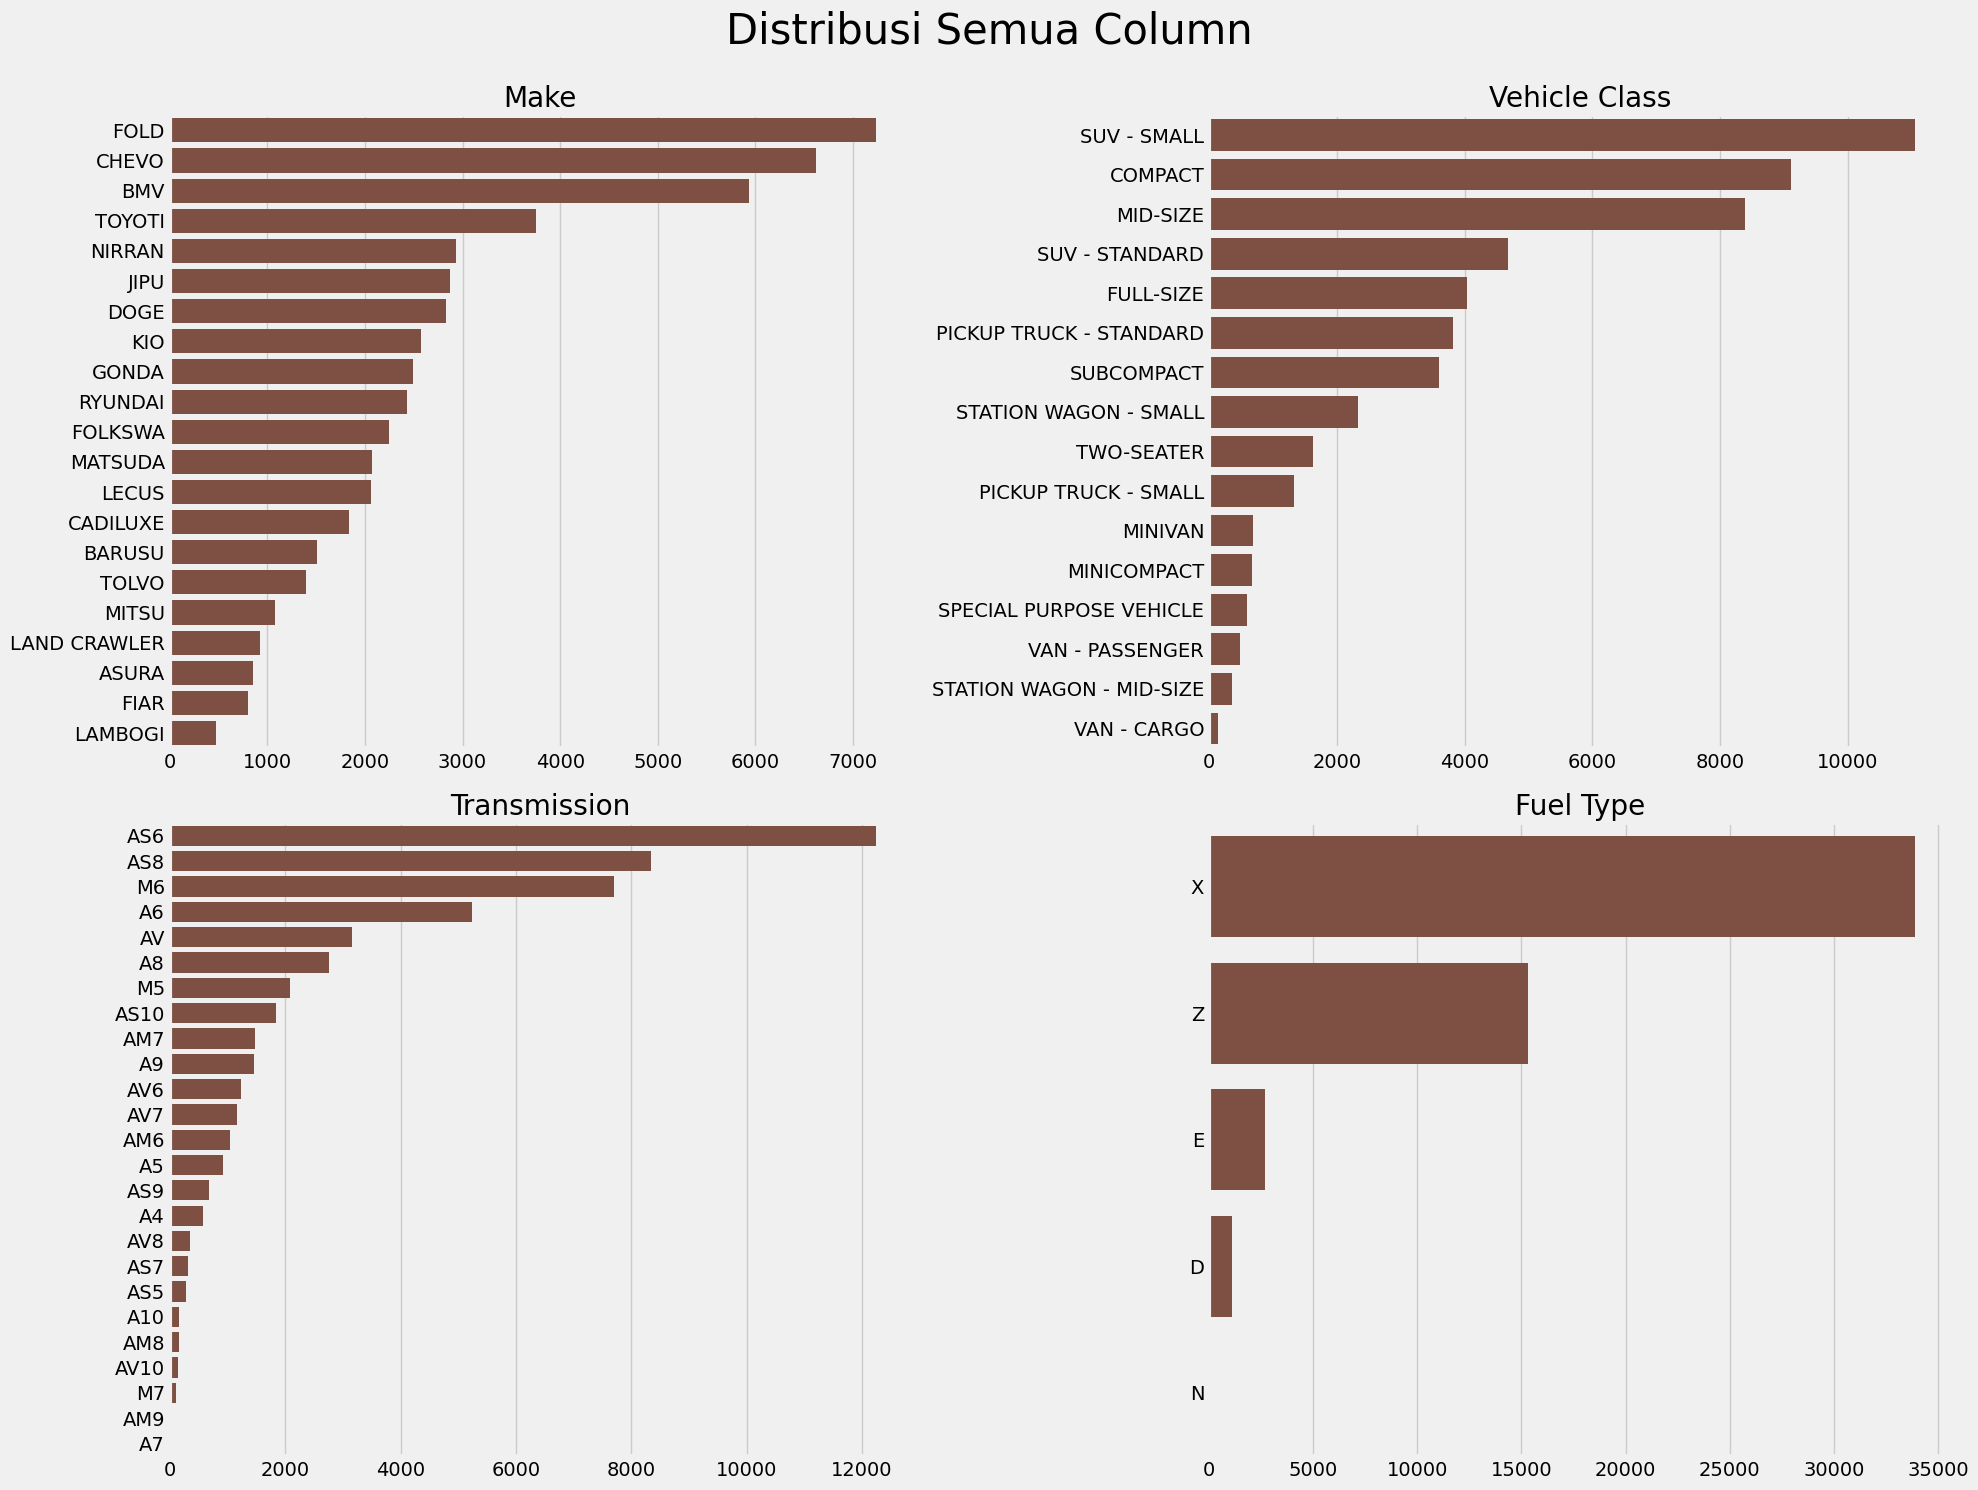

In [12]:
categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=data_eda, ax=axes[i], order=data_eda[column].value_counts().index, palette=["#884A39"])
    axes[i].tick_params(axis='x')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.suptitle('Distribusi Semua Column', fontsize=30, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.show()


Menggunakan visualisasi data tertinggi untuk variabel 'Make', 'Vehicle Class', 'Transmission', dan 'Fuel Type' memberikan wawasan yang berharga tentang karakteristik dominan dalam dataset kendaraan di kota Wiliwilowilev. Berikut adalah ringkasan visualisasi tersebut:

1. **Make - Produsen Kendaraan:**
   - Visualisasi menunjukkan bahwa produsen kendaraan yang paling dominan (dengan frekuensi tertinggi) adalah 'FOLD', 'CHEVO', dan 'BMV' di kota Wiliwilowilev. Hal ini menandakan bahwa kendaraan dari produsen-produsen ini memiliki kontribusi yang signifikan dalam dataset.

2. **Vehicle Class - Klasifikasi Kendaraan:**
   - Kategori kendaraan 'SUV-SMALL' mendominasi visualisasi, menunjukkan bahwa kendaraan jenis SUV kecil memiliki kehadiran yang tinggi di kota tersebut. Ini dapat memberikan wawasan tentang preferensi atau kepopuleran jenis kendaraan tertentu di kota tersebut.

3. **Transmission - Jenis Transmisi:**
   - Visualisasi menyoroti bahwa jenis transmisi 'Automatic Select Shift (AS6)' memiliki frekuensi tertinggi. Ini menandakan bahwa transmisi otomatis dengan perpindahan gigi pilihan adalah yang paling umum di antara kendaraan di kota tersebut.

4. **Fuel Type - Jenis Bahan Bakar:**
   - Jenis bahan bakar 'Regular Gasoline (X)' mencapai frekuensi tertinggi dalam visualisasi. Ini menunjukkan bahwa mayoritas kendaraan di kota menggunakan bensin biasa sebagai bahan bakar utama.


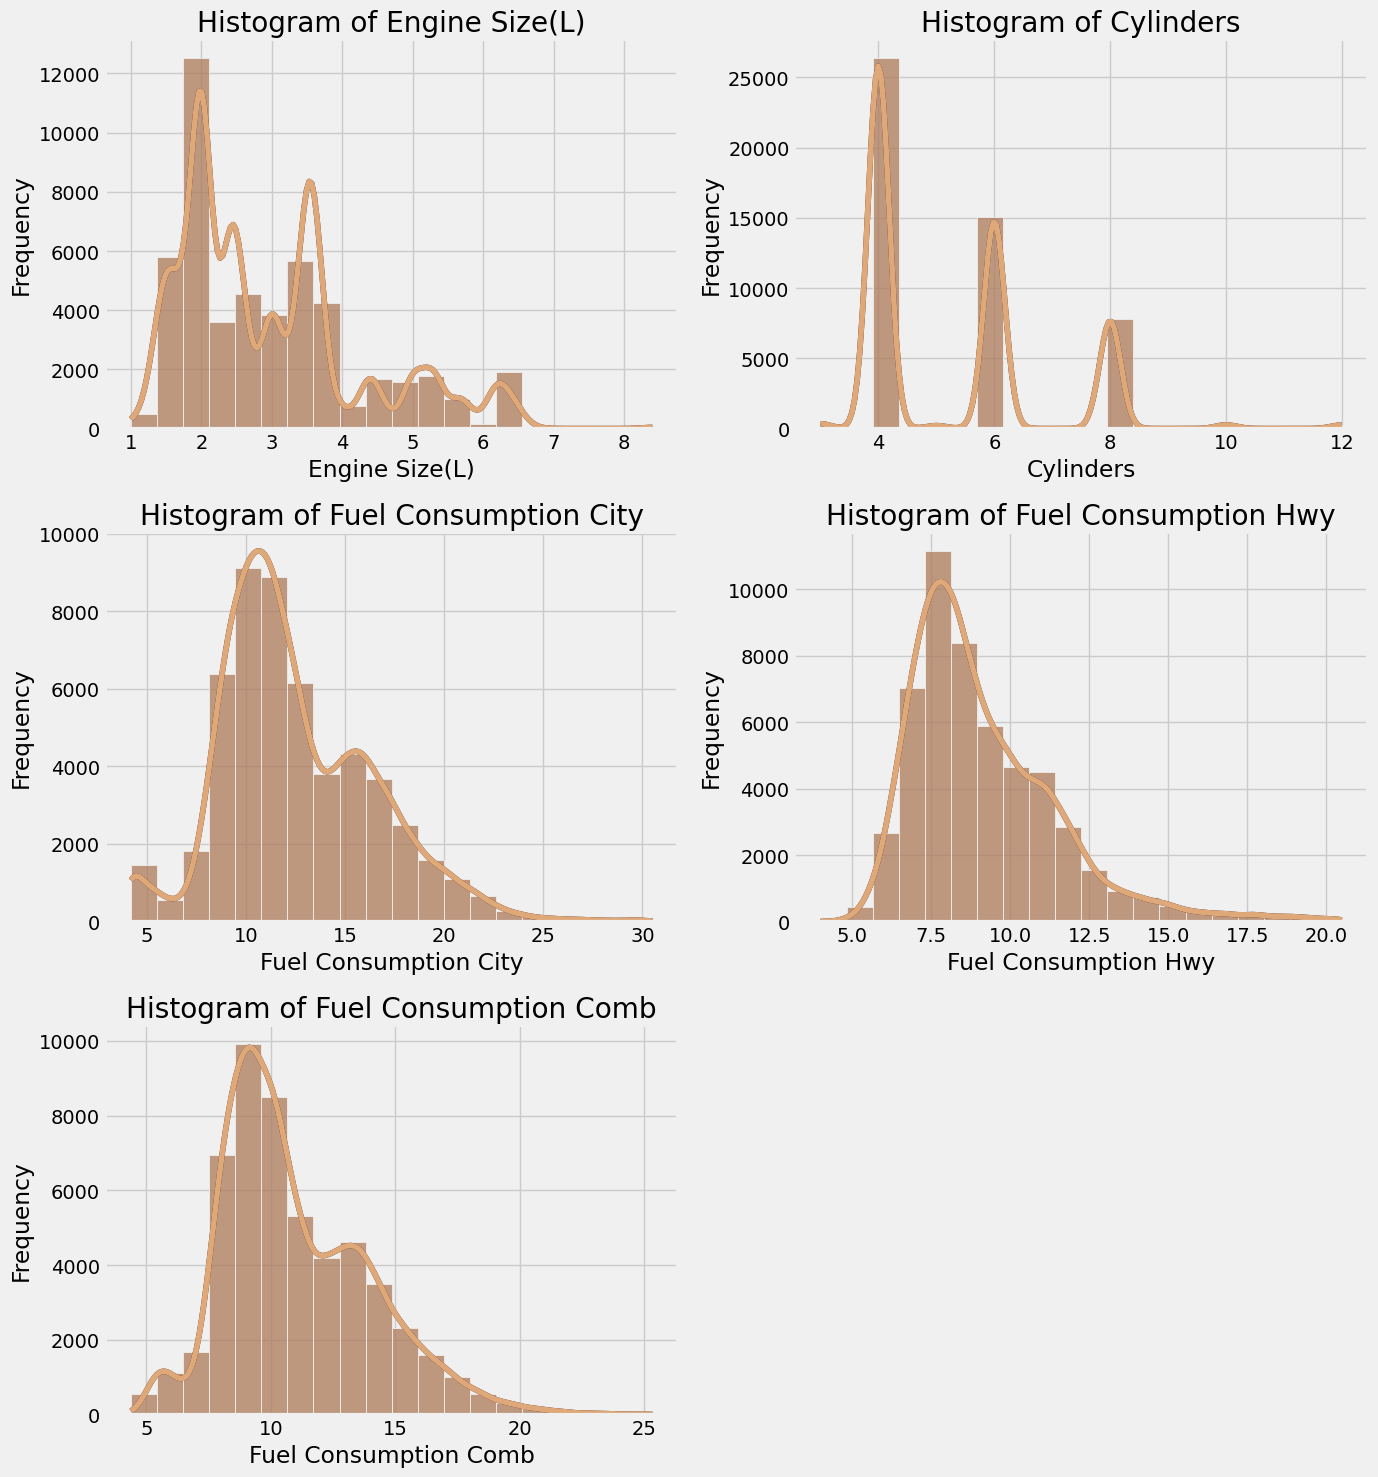

In [13]:
selected_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

plt.figure(figsize=(14, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 2, i)
    color_palette = ["#482121", "#DFA878"]
    
    for j, color in enumerate(color_palette):
        sns.histplot(data_eda[column], kde=True, bins=20, color=color)
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dalam konteks proyek ini, ketika kita menyatakan bahwa distribusi tingkat konsumsi bahan bakar (Fuel Consumption City, Fuel Consumption Hwy, dan Fuel Consumption Comb) memiliki **positive skewness** atau **cenderung ke kanan**, maknanya adalah mayoritas kendaraan memiliki tingkat konsumsi bahan bakar yang relatif rendah, sementara sebagian kecil kendaraan memiliki tingkat konsumsi yang tinggi.

Dengan kata lain, sebagian besar kendaraan di kota cenderung efisien dalam hal konsumsi bahan bakar, namun ada kelompok kendaraan tertentu yang menonjol dengan tingkat konsumsi bahan bakar yang lebih tinggi. Hal ini dapat menjadi fokus perhatian dalam upaya untuk mengurangi emisi CO2, karena kendaraan dengan konsumsi bahan bakar tinggi dapat memiliki dampak yang signifikan pada tingkat emisi secara keseluruhan. Oleh karena itu, strategi untuk meningkatkan efisiensi atau merinci penggunaan kendaraan dengan tingkat konsumsi tinggi dapat menjadi langkah-langkah yang relevan dalam rangka mencapai tujuan proyek ini.

<div style="background-color: #00ff00">IDENTIFIKASI ANOMALI</div>

Palette

In [14]:
cmap = colors.ListedColormap(["#482121", "#6C3428", "#884A39", "#BA704F", "#DFA878",  "#EAC696", "#EAD7BB",  "#FFF2D8"])
pal = (["#DFA878", "#482121"])

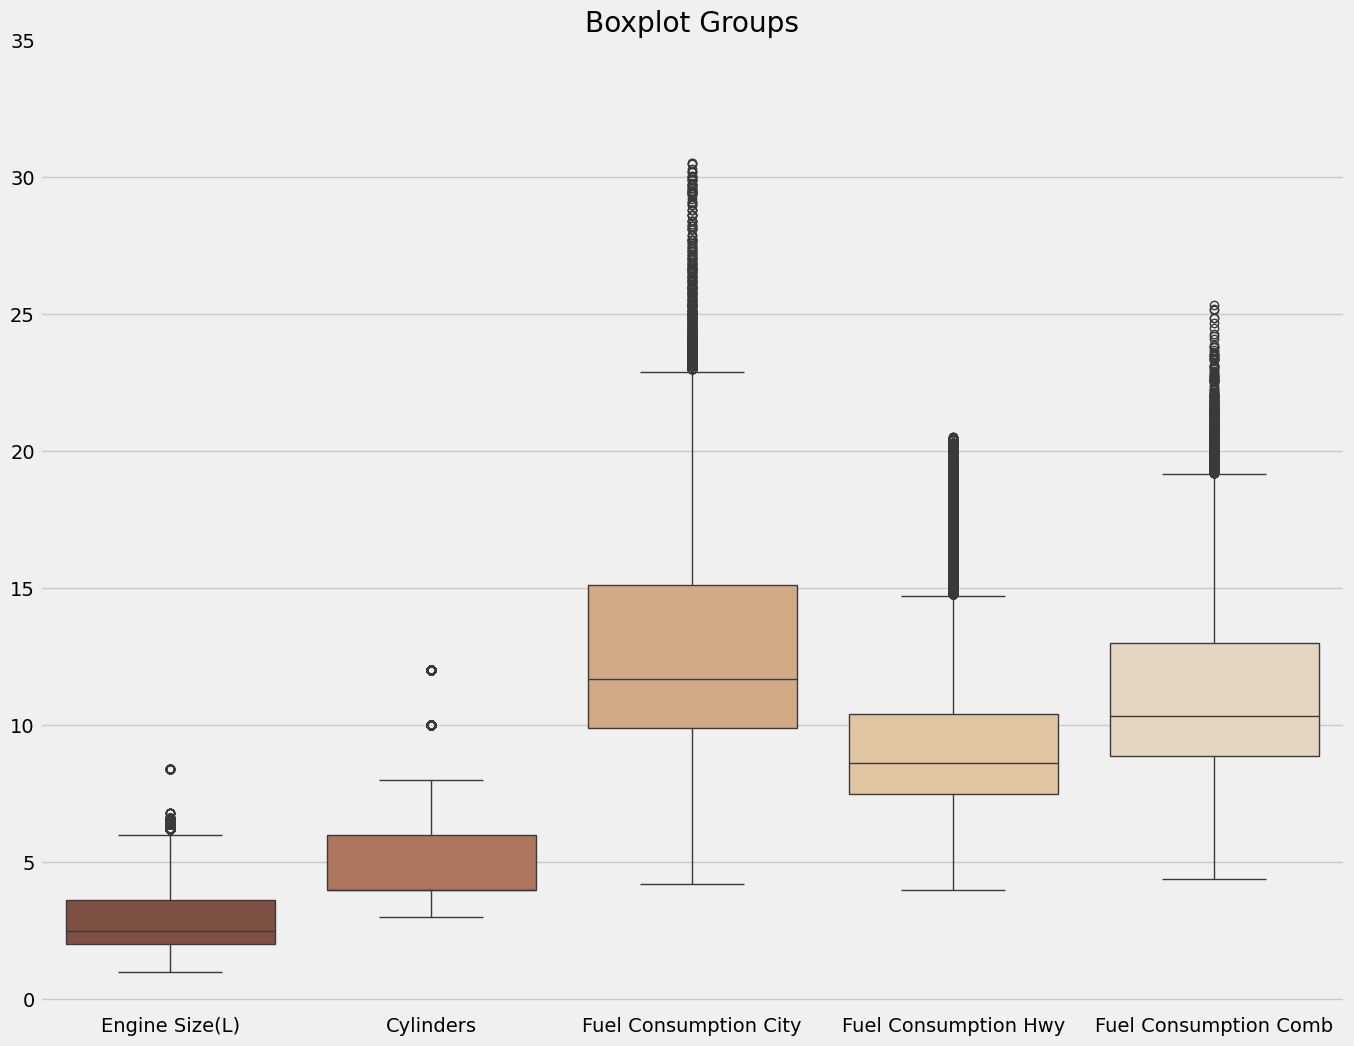

Lower, Upper Bounds, and Median for Quartiles:
+-----------------------+-------------+-------------+--------+
|         Column        | Lower Bound | Upper Bound | Median |
+-----------------------+-------------+-------------+--------+
|     Engine Size(L)    |    -0.40    |     6.00    |  2.50  |
|       Cylinders       |     1.00    |     9.00    |  4.00  |
| Fuel Consumption City |     2.09    |    22.92    | 11.70  |
|  Fuel Consumption Hwy |     3.15    |    14.75    |  8.60  |
| Fuel Consumption Comb |     2.70    |    19.18    | 10.32  |
+-----------------------+-------------+-------------+--------+


In [15]:
data_eda[selected_columns] = data_eda[selected_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 12))
sns.boxplot(data=data_eda[selected_columns],palette=["#884A39", "#BA704F", "#DFA878",  "#EAC696", "#EAD7BB",  "#FFF2D8"])
plt.yticks(range(0, 36, 5))
plt.title('Boxplot Groups')
plt.show()

data_eda[selected_columns] = data_eda[selected_columns].apply(pd.to_numeric, errors='coerce')

table_bounds = PrettyTable(['Column', 'Lower Bound', 'Upper Bound', 'Median'])

for column in selected_columns:
    Q1 = data_eda[column].quantile(0.25)
    Q2 = data_eda[column].median()
    Q3 = data_eda[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound:.2f}', f'{upper_bound:.2f}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

Dalam analisis box plot, kita dapat melihat bahwa sebagian besar kendaraan di kota Wiliwilowilev memiliki kapasitas mesin berkisar antara 2 hingga 4 liter, dengan mayoritas memiliki 4 hingga 6 silinder. Namun, terdapat kendaraan-kendaraan tertentu yang menjadi outlier atas, menunjukkan adanya mesin yang lebih besar dan jumlah silinder yang lebih banyak daripada rata-rata.

Ketika melihat tingkat konsumsi bahan bakar, mayoritas kendaraan memiliki tingkat konsumsi yang relatif rendah, terutama di dalam kota. Meskipun begitu, kita juga melihat adanya outlier atas pada tingkat konsumsi bahan bakar, terutama dalam kondisi kota dan jalan raya, menunjukkan adanya kendaraan dengan tingkat konsumsi bahan bakar yang signifikan lebih tinggi daripada mayoritas.

Temuan ini memberikan kita wawasan tentang karakteristik kendaraan di kota ini, dengan adanya potensi kontribusi emisi CO2 yang tinggi dari kendaraan-kendaraan tertentu. Identifikasi merek dan model kendaraan yang menjadi outlier dapat menjadi langkah awal dalam merancang strategi yang lebih spesifik dan efektif untuk mengurangi emisi CO2 dan meningkatkan kualitas udara di Wiliwilowilev.

### 3.2 Bivariate Analysis

<div style="background-color: #00ff00">IDENTIFIKASI TREN</div>

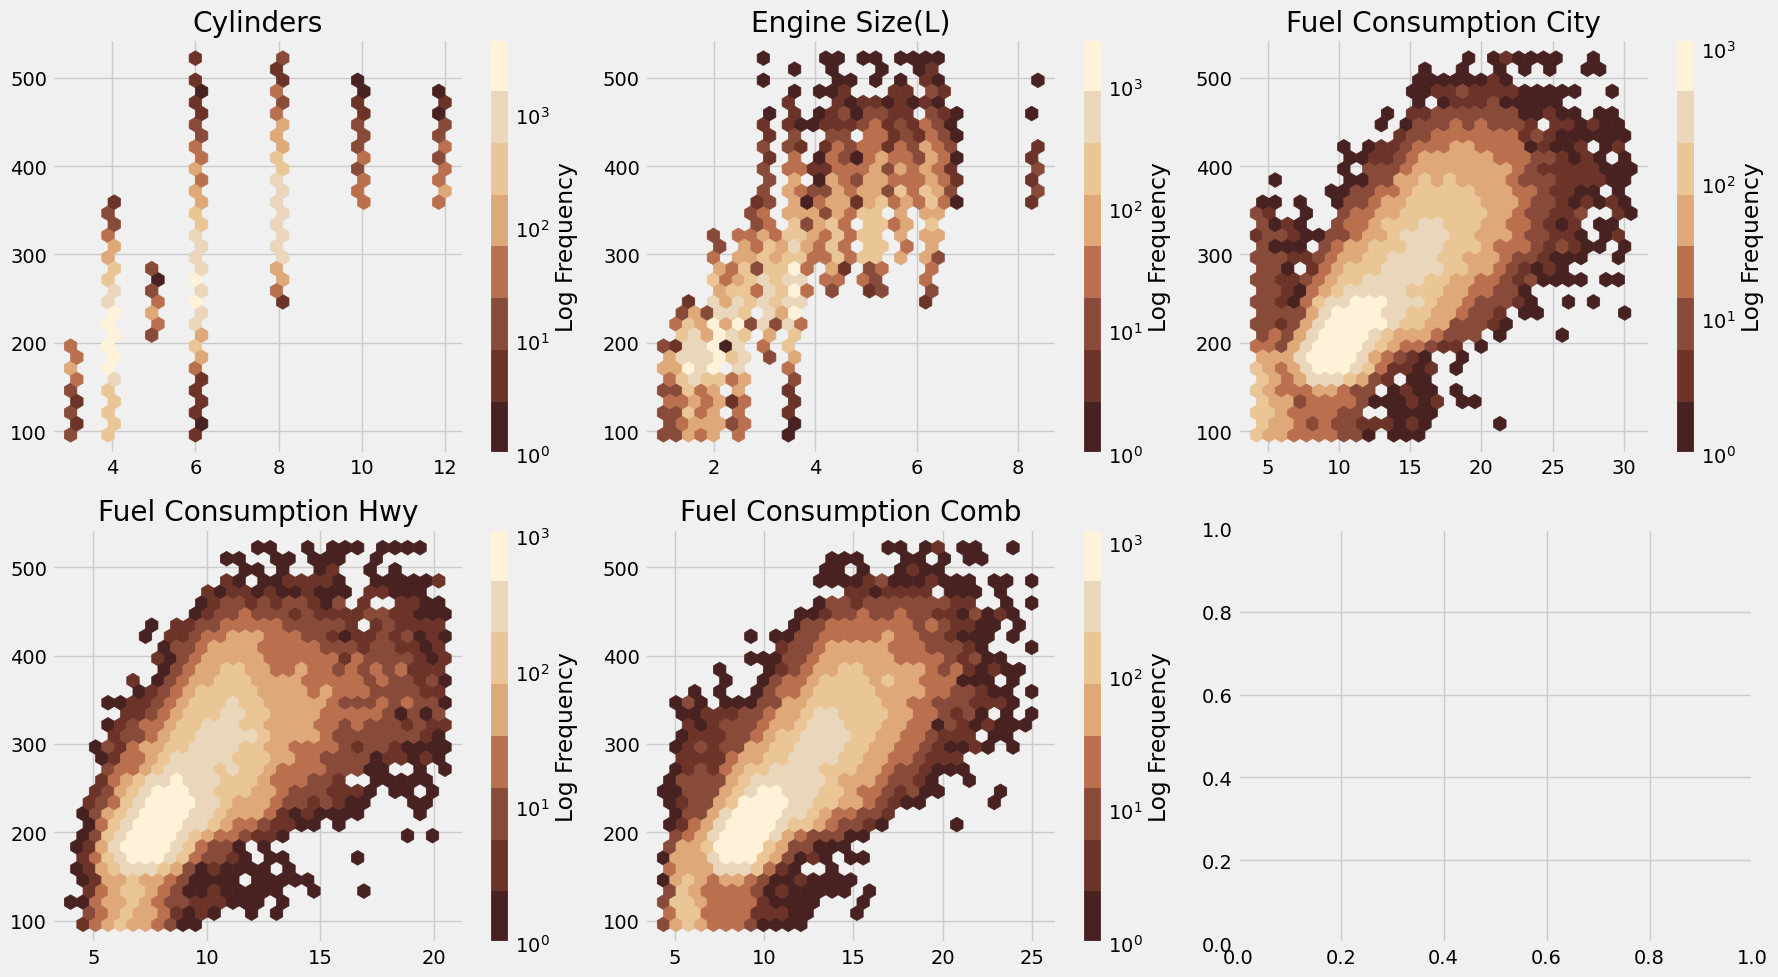

In [16]:
variables_to_plot = ['Cylinders', 'Engine Size(L)','Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, variable in enumerate(variables_to_plot):
    hb = axes[i].hexbin(data_eda[variable], data_eda['CO2 Emissions(g/km)'], gridsize=30, cmap=cmap, bins='log')
    axes[i].set_title(f'{variable}')
    plt.colorbar(hb, ax=axes[i], label='Log Frequency')

plt.tight_layout()
plt.show()

Hexbin plot adalah jenis visualisasi yang berguna untuk menunjukkan hubungan dua variabel numerik dalam konteks distribusi yang padat. Dalam kasus ini, kita akan menggunakan hexbin plot untuk mengeksplorasi hubungan antara dua variabel numerik tertentu.

**Area yang Gelap (10 pangkat 0)** Menunjukkan bahwa ada beberapa kendaraan dengan kombinasi tertentu dari kapasitas mesin (Engine Size) serta Fuel Consumption dan emisi CO2 yang tidak terlalu umum. Meskipun ada, tetapi mungkin tidak banyak kendaraan dengan karakteristik ini.

**Area yang Terang (10 pangkat 3)** Menunjukkan bahwa ada banyak kendaraan dengan kombinasi tertentu dari Engine Size serta Fuel Consumption dan CO2 Emissions yang lebih umum. Ini bisa menjadi area di mana sebagian besar kendaraan berkumpul, atau mungkin mengindikasikan adanya tren tertentu dalam distribusi data.

<div style="background-color: #00ff00">IDENTIFIKASI POLA</div>

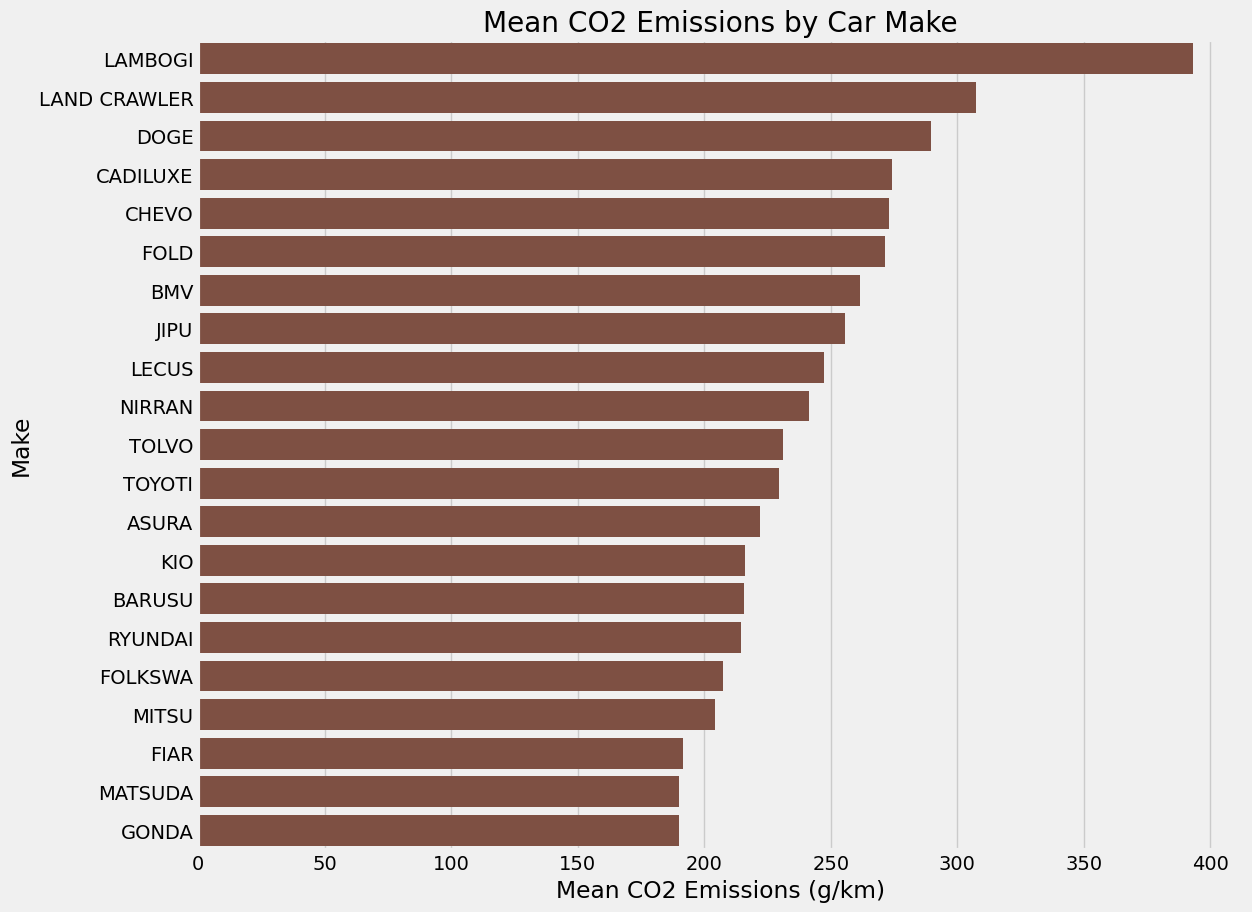

index          Make  CO2 Emissions(g/km)
0      0       LAMBOGI           392.924686
1      1  LAND CRAWLER           307.475780
2      2          DOGE           289.598233
3      3      CADILUXE           274.129085
4      4         CHEVO           272.841716

In [17]:
mean_emissions = data.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 10))
sns.barplot(x='CO2 Emissions(g/km)', y='Make', data=mean_emissions, palette=["#884A39"])
plt.title('Mean CO2 Emissions by Car Make')
plt.xlabel('Mean CO2 Emissions (g/km)')
plt.ylabel('Make')
plt.show()

mean_emissions.head().reset_index()

Berdasarkan hasil analisis, terdapat beberapa merek kendaraan yang menunjukkan tingkat emisi CO2 yang tinggi di kota Wiliwilowilev. Berikut adalah narasi penjelasan untuk beberapa merek dengan emisi CO2 tertinggi:

1. **LAMBOGI:**
   - Merek LAMBOGI menunjukkan emisi CO2 yang sangat tinggi, mencapai 392.924686 g/km. Kemungkinan, kendaraan dari merek ini memiliki kapasitas mesin besar atau menggunakan bahan bakar dengan tingkat emisi yang tinggi.

2. **LAND CRAWLER:**
   - Merek LAND CRAWLER menunjukkan tingkat emisi CO2 sebesar 307.475780 g/km. Hal ini mungkin disebabkan oleh sifat atau spesifikasi kendaraan, seperti jenis mesin atau ukuran kendaraan yang dapat berkontribusi pada emisi yang lebih tinggi.

3. **DOGE:**
   - Merek DOGE menunjukkan emisi CO2 sebesar 289.598233 g/km. Faktor-faktor seperti teknologi mesin atau jenis bahan bakar yang digunakan oleh kendaraan DOGE dapat memainkan peran dalam tingginya tingkat emisi ini.

4. **CADILUXE:**
   - Merek CADILUXE memiliki emisi CO2 sebesar 274.129085 g/km. Karakteristik mewah atau ukuran mesin yang besar pada kendaraan CADILUXE mungkin berdampak pada tingkat emisi yang lebih tinggi.

5. **CHEVO:**
   - Merek CHEVO memiliki tingkat emisi CO2 sebesar 272.841716 g/km. Kemungkinan besar, spesifikasi kendaraan ini, seperti jenis transmisi atau ukuran mesin, dapat mempengaruhi tingkat emisi yang tinggi.


Data Categoric Top 3 and Bottom 3 of Make VS CO2 Emissions, bertujuan mencari mengapa Top 3 bisa unggul lebih daripada data yang lain

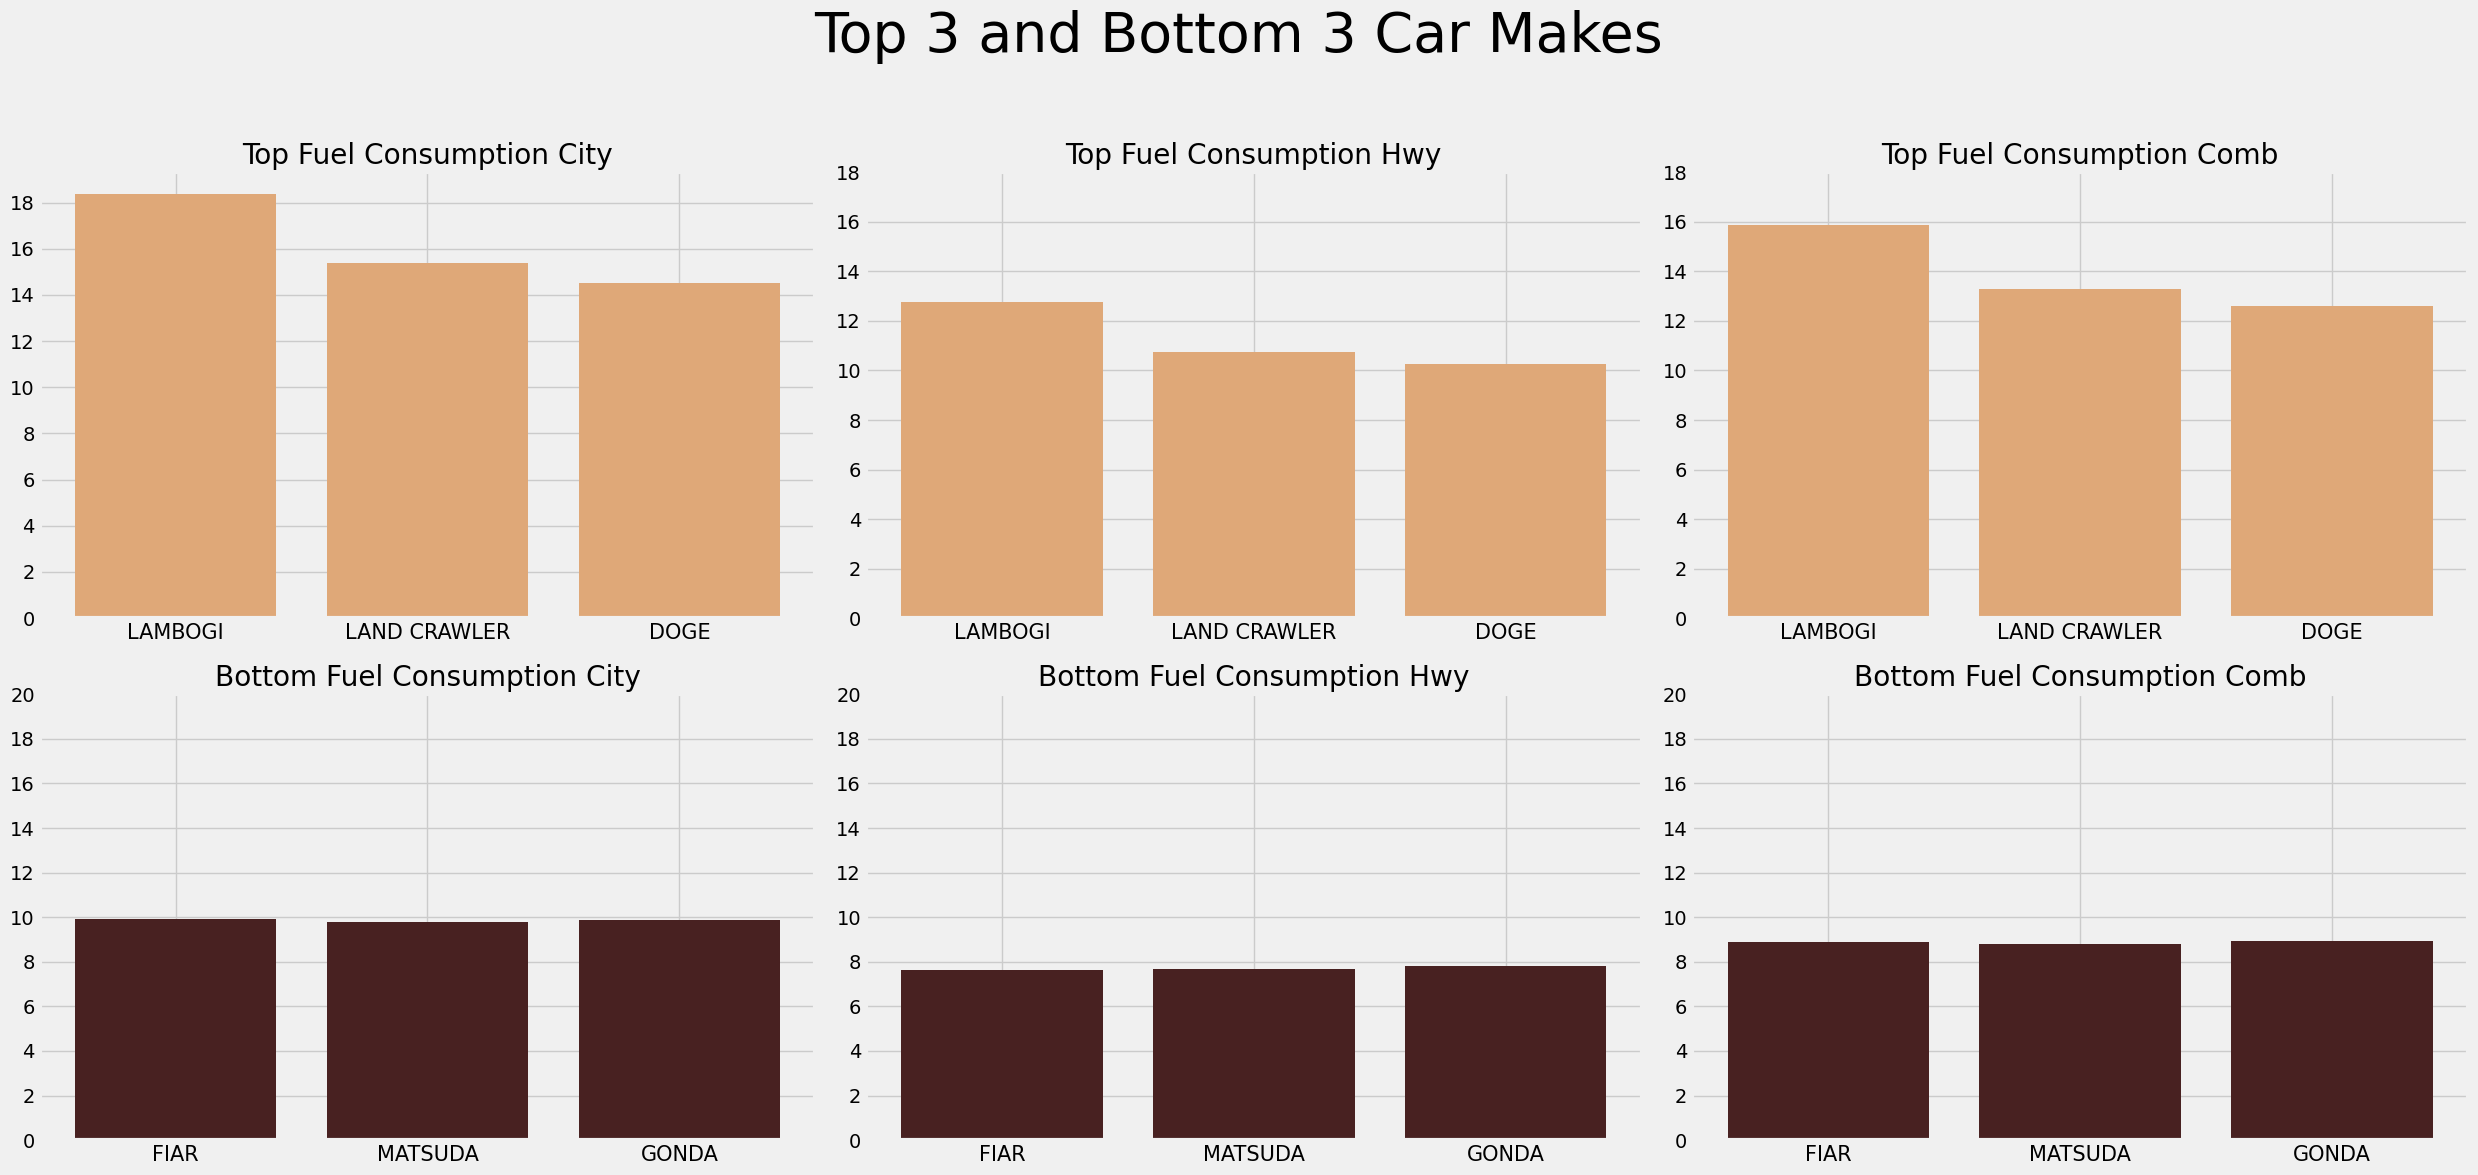

CO2 Emissions(g/km)  Fuel Consumption City  \
Make                                                       
LAMBOGI                392.924686              18.393087   
LAND CRAWLER           307.475780              15.403523   
DOGE                   289.598233              14.525243   
FIAR                   191.439601               9.930659   
MATSUDA                190.020221               9.789266   
GONDA                  189.889334               9.893374   

              Fuel Consumption Hwy  Fuel Consumption Comb  
Make                                                       
LAMBOGI                  12.744630              15.887675  
LAND CRAWLER             10.742852              13.288408  
DOGE                     10.258750              12.589122  
FIAR                      7.614242               8.888013  
MATSUDA                   7.660700               8.820986  
GONDA                     7.793733               8.954989

In [18]:
selected_columns = ['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

data_eda[selected_columns] = data_eda[selected_columns].apply(pd.to_numeric, errors='coerce')

grouped_data = data_eda.groupby('Make')[['CO2 Emissions(g/km)'] + selected_columns].mean().sort_values(by='CO2 Emissions(g/km)', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 12))
fig.suptitle('Top 3 and Bottom 3 Car Makes', fontsize=40)

for i, col in enumerate(selected_columns):
    # Top 3
    axes[0, i].bar(grouped_data.head(3).index, grouped_data.head(3)[col], color=pal[0])
    axes[0, i].set_title(f'Top {col}')
    axes[0, i].tick_params(axis='x', labelsize=15)
    axes[0, i].set_yticks(range(0, 19, 2))

    # Bottom 3
    axes[1, i].bar(grouped_data.tail(3).index, grouped_data.tail(3)[col], color=pal[1])
    axes[1, i].set_title(f'Bottom {col}')
    axes[1, i].tick_params(axis='x', labelsize=15)
    axes[1, i].set_yticks(range(0, 21, 2))

plt.tight_layout(rect=[0, 0, 1, 0.95])

if len(selected_columns) < 3:
    fig.delaxes(axes[0, len(selected_columns):])
    fig.delaxes(axes[1, len(selected_columns):])

plt.show()

concatenated_data = pd.concat([grouped_data.head(3), grouped_data.tail(3)])
concatenated_data

**Top 3 Merek (berdasarkan emisi CO2):**

1. **LAMBOGI:**
   - Merek LAMBOGI menonjol sebagai penyumbang emisi CO2 tertinggi di kota Wiliwilowilev dengan nilai mencapai 392.924686 g/km. Kendaraan dari merek ini, selain memiliki emisi CO2 yang tinggi, juga menunjukkan tingkat konsumsi bahan bakar yang signifikan di area kota.

2. **LAND CRAWLER:**
   - Merek LAND CRAWLER menduduki peringkat kedua dengan emisi CO2 sebesar 307.475780 g/km. Kendaraan jenis off-road ini dapat berkontribusi pada tingginya emisi CO2, dan perlu dipertimbangkan dalam strategi pengurangan emisi.

3. **DOGE:**
   - Merek DOGE menempati posisi ketiga dengan emisi CO2 sebesar 289.598233 g/km. Meskipun tidak sebesar LAMBOGI dan LAND CRAWLER, kendaraan DOGE tetap menjadi perhatian karena memberikan kontribusi yang cukup besar terhadap emisi CO2 di kota.

**Bottom 3 Merek (berdasarkan emisi CO2):**

1. **FIAR:**
   - Merek FIAR menunjukkan emisi CO2 terendah di antara merek lain dengan nilai sebesar 191.439601 g/km. Mesin kendaraan FIAR, bersama dengan tingkat konsumsi bahan bakar yang relatif rendah, dapat menjadi contoh dalam upaya mengurangi emisi CO2.

2. **MATSUDA:**
   - Merek MATSUDA berada pada peringkat kedua terendah dengan emisi CO2 sebesar 190.020221 g/km. Fokus pada kendaraan MATSUDA dapat memberikan ide strategis untuk mempromosikan kendaraan dengan emisi rendah di kota.

3. **GONDA:**
   - Merek GONDA memiliki emisi CO2 sebesar 189.889334 g/km, menjadikannya merek dengan emisi terendah. Kendaraan GONDA dapat menjadi contoh bagaimana implementasi teknologi ramah lingkungan dapat mengurangi dampak emisi CO2.

Analisis ini memberikan wawasan konkret tentang merek kendaraan yang memiliki kontribusi signifikan terhadap tingginya emisi CO2 di kota. Dengan menargetkan merek-merek ini dalam strategi pengurangan emisi, pemerintah dapat mengambil langkah-langkah konkret untuk memperbaiki kualitas udara dan mengatasi krisis lingkungan yang dihadapi oleh penduduk Wiliwilowilev.

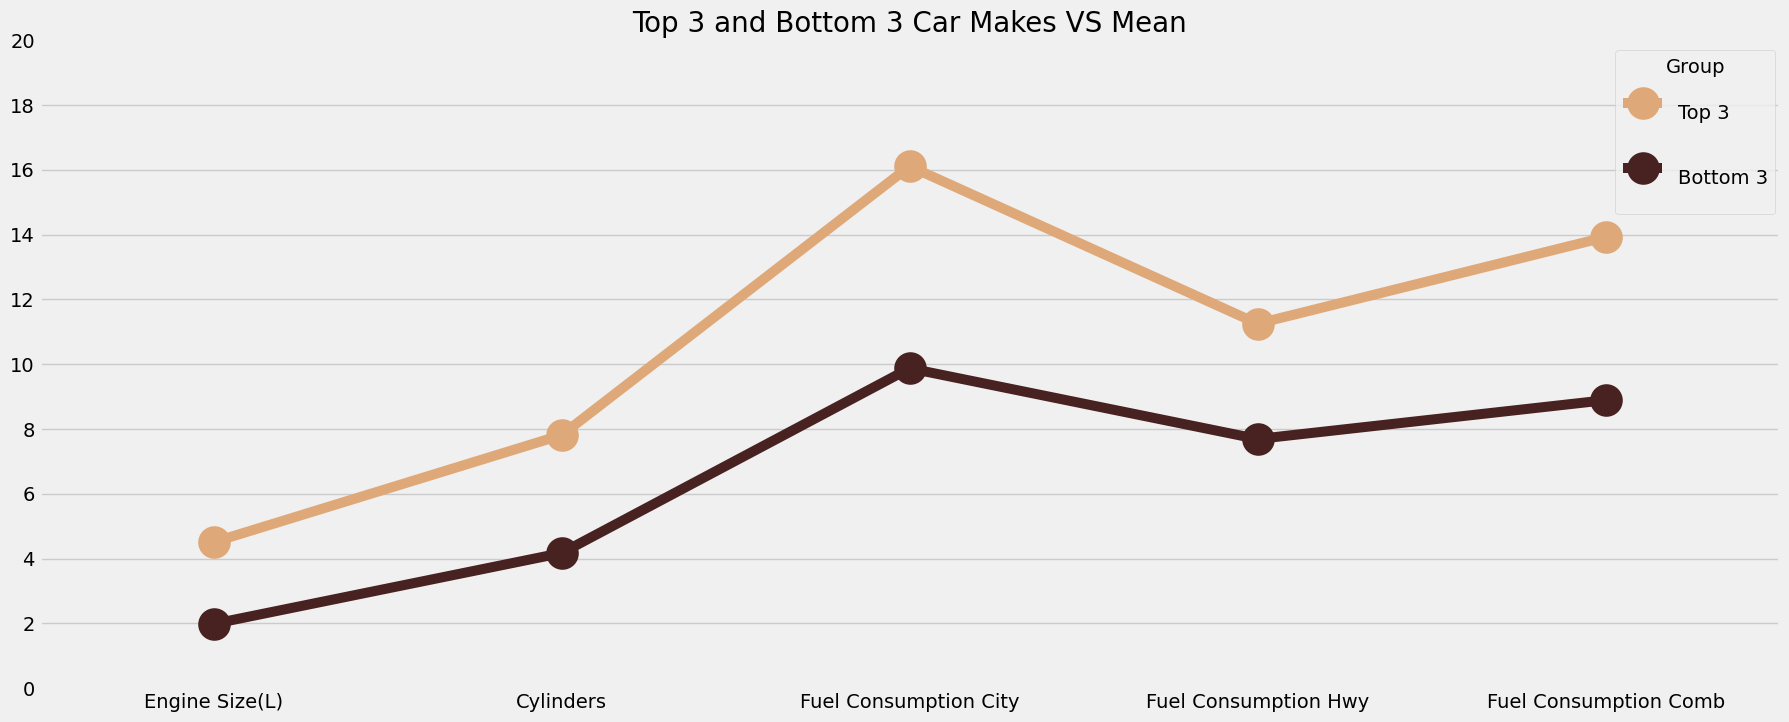

Group               variable      value
0     Top 3         Engine Size(L)   4.506391
1  Bottom 3         Engine Size(L)   1.984712
2     Top 3              Cylinders   7.810978
3  Bottom 3              Cylinders   4.169882
4     Top 3  Fuel Consumption City  16.107284
5  Bottom 3  Fuel Consumption City   9.871100
6     Top 3   Fuel Consumption Hwy  11.248744
7  Bottom 3   Fuel Consumption Hwy   7.689558
8     Top 3  Fuel Consumption Comb  13.921735
9  Bottom 3  Fuel Consumption Comb   8.887996

In [19]:
selected_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

data_eda[selected_columns] = data_eda[selected_columns].apply(pd.to_numeric, errors='coerce')

grouped_data = data_eda.groupby('Make')[['CO2 Emissions(g/km)'] + selected_columns].mean().sort_values(by='CO2 Emissions(g/km)', ascending=False)

top_3 = grouped_data.head(3)
bottom_3 = grouped_data.tail(3)

combined_top = top_3[selected_columns].mean(axis=0)
combined_bottom = bottom_3[selected_columns].mean(axis=0)

combined_data = pd.concat([pd.DataFrame(combined_top).T.assign(Group='Top 3'), pd.DataFrame(combined_bottom).T.assign(Group='Bottom 3')])

melted_data = pd.melt(combined_data, id_vars=['Group'], value_vars=selected_columns)

plt.figure(figsize=(20, 8))
sns.pointplot(x='variable', y='value', hue='Group', data=melted_data, palette=pal, ci=None)
plt.title('Top 3 and Bottom 3 Car Makes VS Mean', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.yticks(range(0,21,2))
plt.legend(title='Group', bbox_to_anchor=(0.9, 1), loc='upper left', handleheight=4)
plt.show()

melted_data

Disini bisa dilihat bahwa memang Top 3 unggul dari segala columns Dependent lain

### 3.3 Multivariant

<div style="background-color: #00ff00">IDENTIFIKASI TREN</div>

### Korelasi dari semua Features

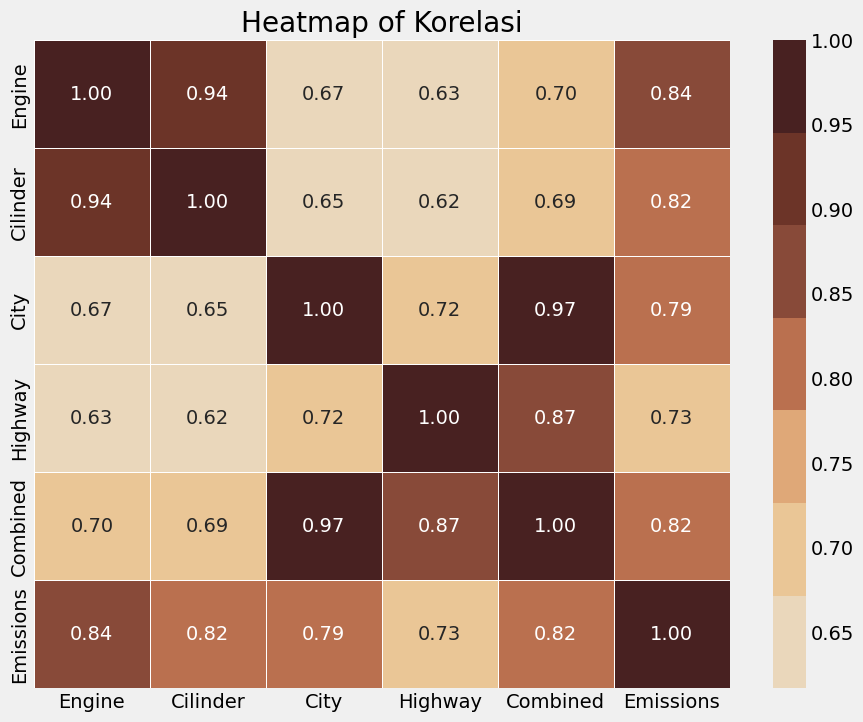

In [20]:
cmap = colors.ListedColormap(["#EAD7BB", "#EAC696", "#DFA878", "#BA704F",  "#884A39", "#6C3428",  "#482121"])

columns_pairplot = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)']

subset_data = data[columns_pairplot].rename(columns={
    'Engine Size(L)': 'Engine',
    'Cylinders': 'Cilinder',
    'Fuel Consumption City': 'City',
    'Fuel Consumption Hwy': 'Highway',
    'Fuel Consumption Comb': 'Combined',
    'CO2 Emissions(g/km)': 'Emissions'
})

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Korelasi')
plt.show()

### Pairploting

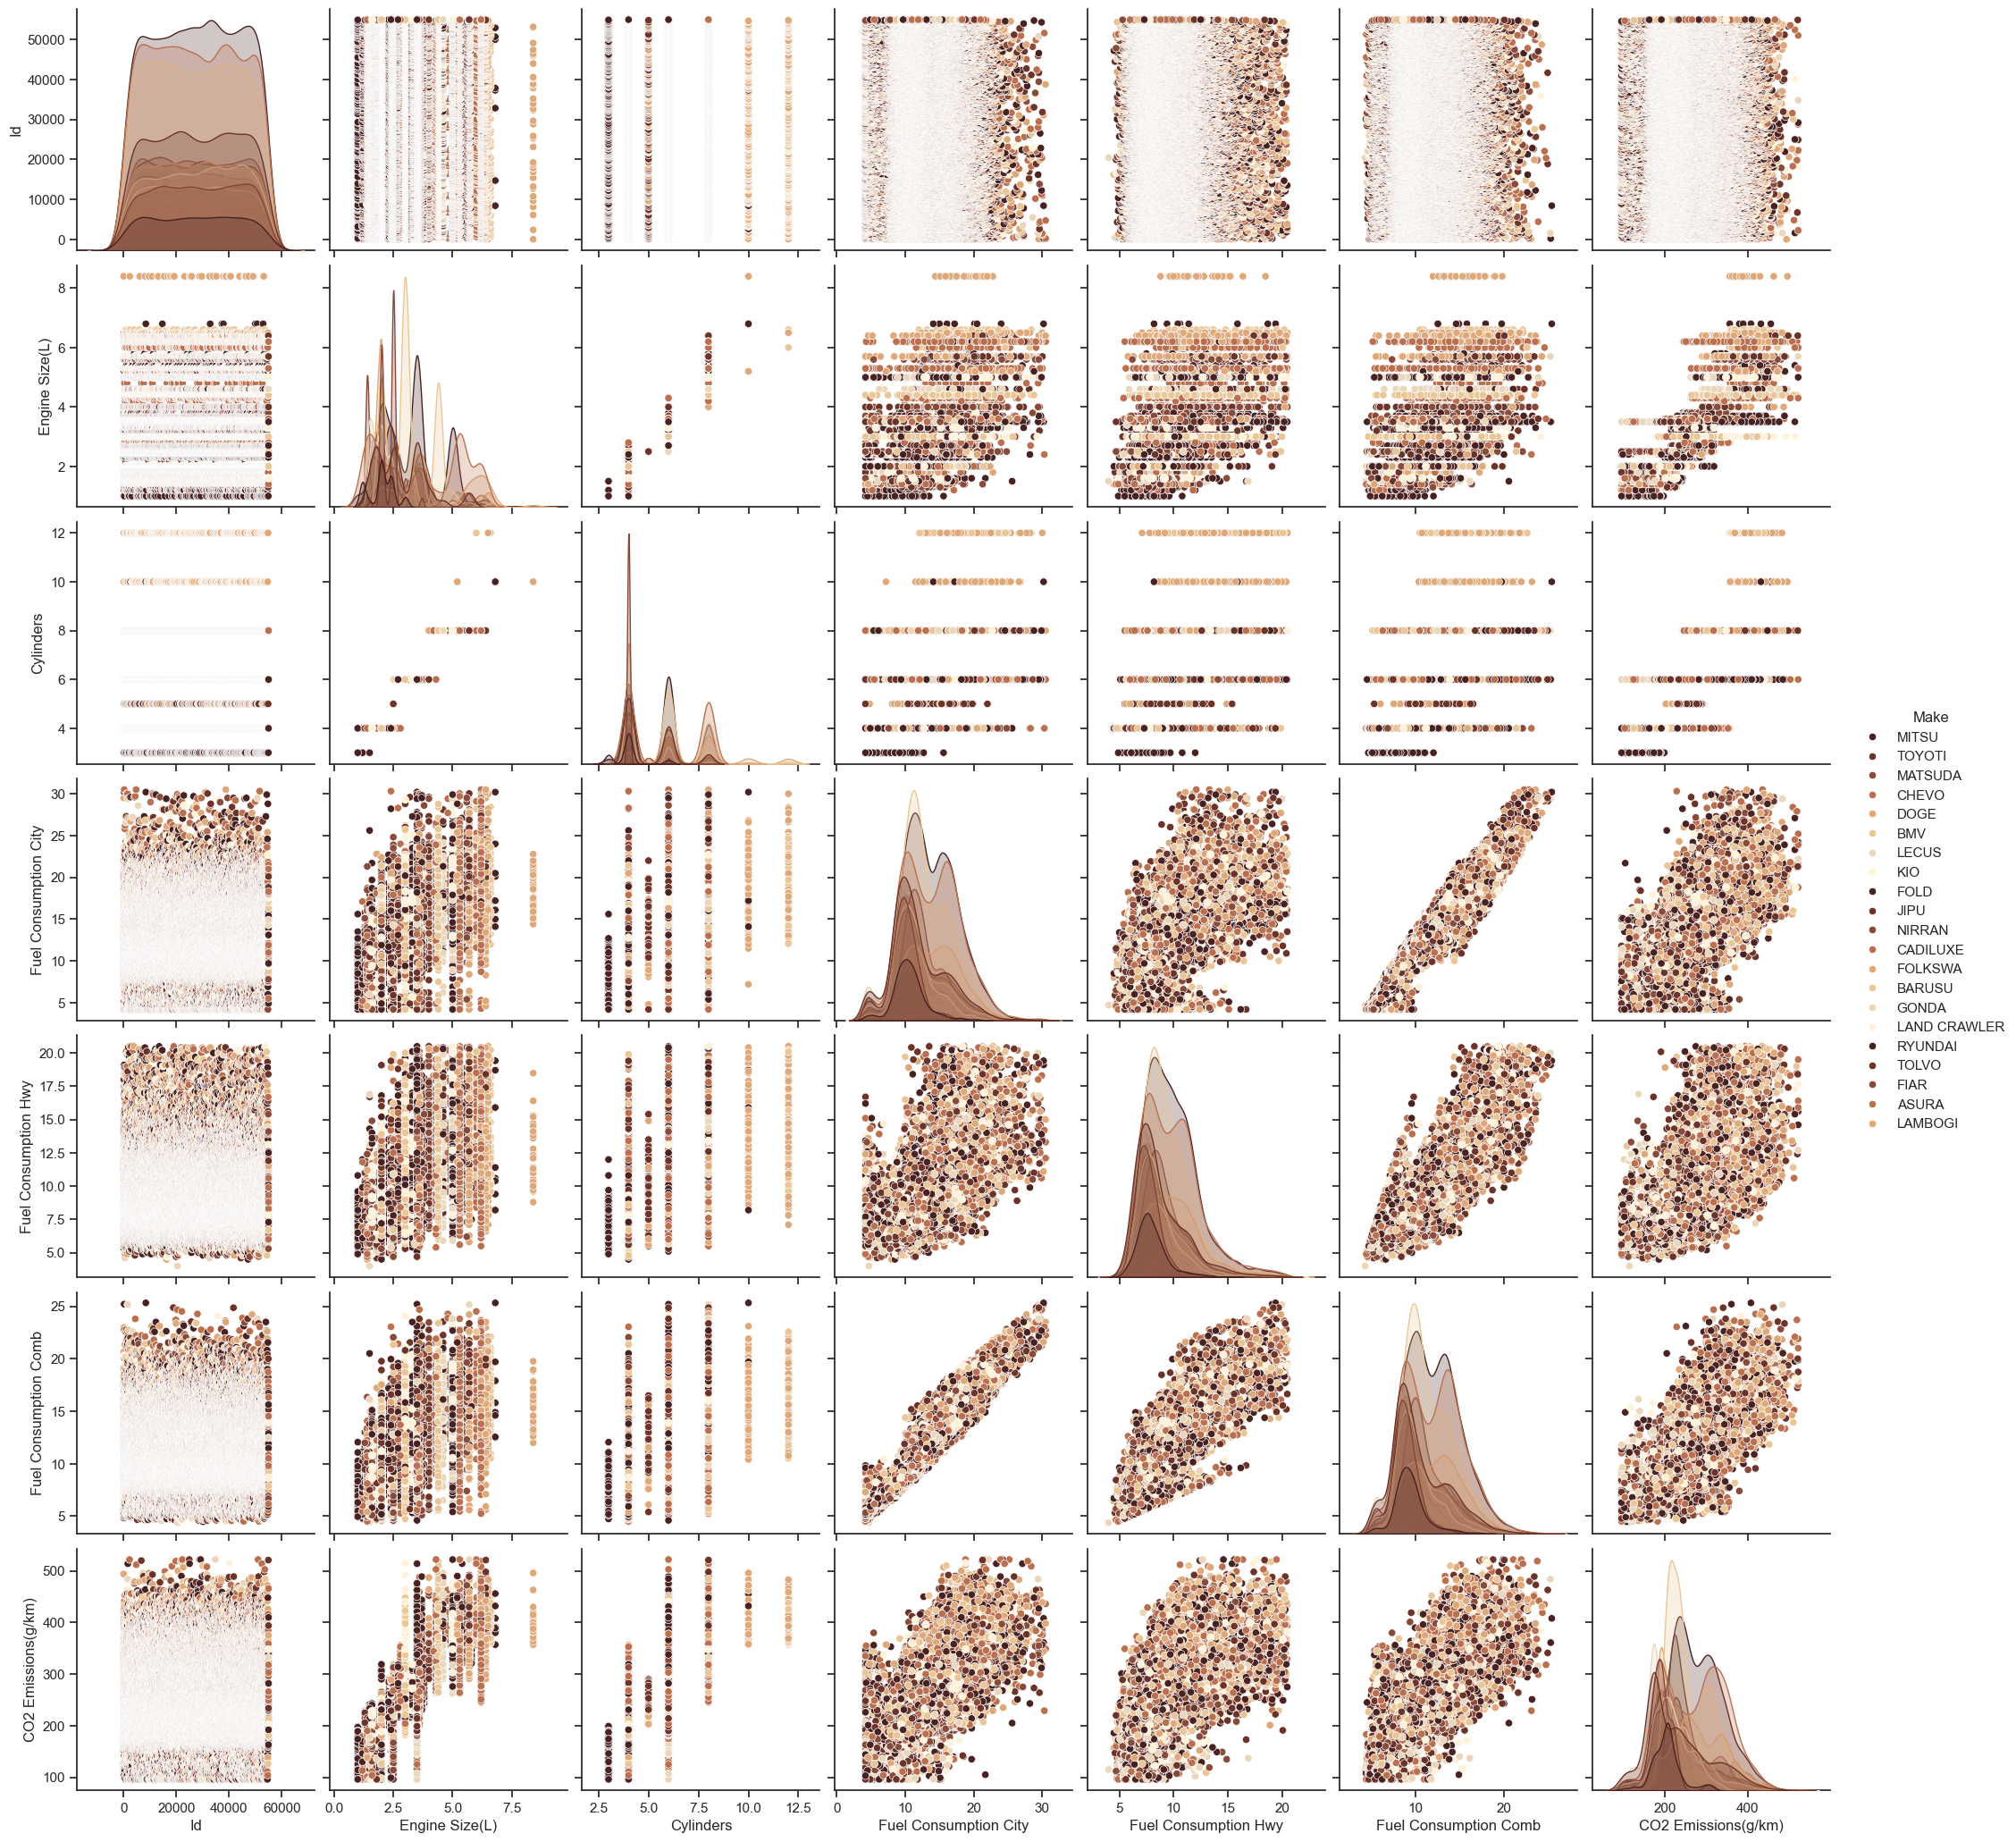

In [21]:
pal = (["#482121", "#6C3428", "#884A39", "#BA704F", "#DFA878",  "#EAC696", "#EAD7BB",  "#FFF2D8"])

numeric_columns = data_eda.select_dtypes(include='number')

# Add 'Make' column to the numeric columns (for hue)
numeric_columns['Make'] = data_eda['Make']

# Set the style of seaborn
sns.set(style="ticks")

# Create pairplot
sns.pairplot(numeric_columns, hue='Make', palette=pal, height=3)
plt.show()

Pairplot adalah visualisasi yang menunjukkan hubungan antara pasangan variabel dalam dataset. Jika pairplot digunakan untuk menganalisis hubungan antara variabel-variabel terkait dengan emisi CO2 dan konsumsi bahan bakar, interpretasinya sebagai berikut:

1. **Hubungan Antar Variabel:**
   - Pairplot memberikan gambaran visual tentang hubungan antara setiap pasangan variabel, termasuk variabel emisi CO2 dan konsumsi bahan bakar dan variabel lainnya. Titik-titik pada grafik tersebar dengan pola atau arah tertentu, hal ini dapat mengindikasikan adanya hubungan atau pola tertentu antara variabel-variabel tersebut.

2. **Korelasi Linear:**
   - Jika terdapat garis yang cenderung lurus dan mendaki atau menurun pada grafik scatterplot, hal ini menunjukkan korelasi linear antara kedua variabel. Misalnya, jika emisi CO2 meningkat seiring dengan peningkatan konsumsi bahan bakar, ini dapat menunjukkan korelasi positif.

3. **Distribusi Variabel:**
   - Diagonal pairplot menampilkan distribusi univariat dari setiap variabel. Jika distribusi variabel emisi CO2 dan konsumsi bahan bakar condong ke kanan atau ke kiri, ini memberikan wawasan tentang sebaran nilai dan dapat membantu mengidentifikasi potensi outlier.

4. **Analisis Multivariat:**
   - Pairplot memungkinkan analisis multivariat, memungkinkan pengamatan terhadap hubungan simultan antara beberapa variabel. Ini memberikan pemahaman yang lebih komprehensif tentang bagaimana variabel-variabel tersebut berinteraksi satu sama lain.

6. **Outlier:**
   - Pairplot dapat membantu dalam mengidentifikasi adanya outlier atau nilai-nilai ekstrim yang mungkin mempengaruhi analisis. Outlier dapat ditemukan dengan melihat titik-titik yang terletak jauh dari kelompok utama pada grafik scatterplot.


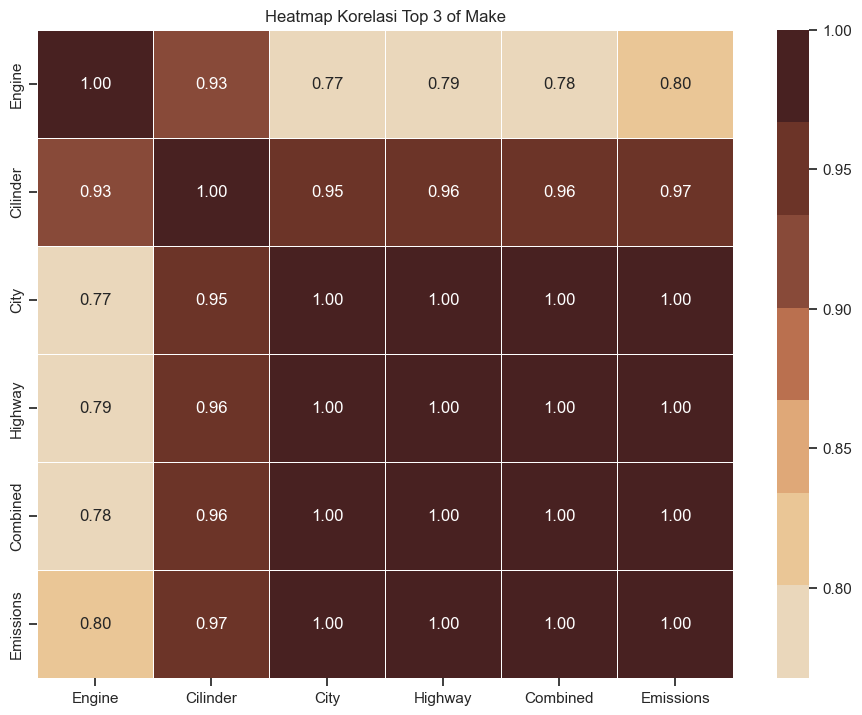

In [22]:
columns_pairplot = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)']

subset_data = top_3[columns_pairplot].rename(columns={
    'Engine Size(L)': 'Engine',
    'Cylinders': 'Cilinder',
    'Fuel Consumption City': 'City',
    'Fuel Consumption Hwy': 'Highway',
    'Fuel Consumption Comb': 'Combined',
    'CO2 Emissions(g/km)': 'Emissions'
})

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Top 3 of Make')
plt.show()

Disini kita bisa lihat bahwa data Top 3 by Make terhadap CO2 sangat memiliki korelasi yang tinggi dari terhadap data numeric lain
1. Korelasi City, Highway, Combined = 1.0
2. Cilinder = 0.97
3. Engine Size = 0.80

Bisa disimpulkan bahwa sangat berpengaruh polusi yang dihasilkan dari berbagai mobil memiliki korelasi yang sangat tinggi terutama pada hasil konsumsi bahan bakar di City, Highway, maupun secara Kombinasi.

Analisis korelasi antara top 3 merek kendaraan (LAMBOGI, LAND CRAWLER, DOGE) dengan emisi CO2 menunjukkan korelasi yang tinggi, maka interpretasinya sebagai berikut:

1. **Pengaruh Bersama terhadap Emisi CO2:**
   - Korelasi positif yang tinggi antara merek-merek ini dengan emisi CO2 mengindikasikan bahwa karakteristik atau faktor-faktor tertentu yang dimiliki oleh kendaraan dari top 3 merek tersebut secara bersamaan berkontribusi pada tingginya emisi CO2 di kota Wiliwilowilev.

2. **Kemungkinan Kesamaan Teknologi atau Jenis Bahan Bakar:**
   - Tingginya korelasi dapat menunjukkan bahwa merek-merek tersebut mungkin menggunakan teknologi mesin atau jenis bahan bakar yang serupa, yang pada gilirannya memiliki dampak serupa terhadap emisi CO2. Ini dapat menjadi titik fokus untuk identifikasi teknologi atau bahan bakar yang mungkin menjadi penyebab utama tingginya emisi.

3. **Strategi Pengurangan Emisi yang Tertarget:**
   - Dengan adanya korelasi yang kuat, strategi pengurangan emisi dapat diarahkan pada merek-merek ini. pemangku kepentingan dapat merancang program dan kebijakan yang ditujukan secara khusus untuk merek-merek tersebut, mencakup insentif untuk adopsi teknologi ramah lingkungan atau peningkatan efisiensi bahan bakar.

Dengan pemahaman lebih lanjut tentang korelasi ini, langkah-langkah konkret dapat diambil untuk mencapai pengurangan emisi CO2 yang efektif dan berkelanjutan di kota Wiliwilowilev.

<div style="background-color: yellow">KESIMPULAN HASIL EDA</div><br>
Berdasarkan analisis EDA yang telah dilakukan pada dataset emisi CO2 dan konsumsi bahan bakar kendaraan di kota Wiliwilowilev, ditemukan beberapa temuan kunci yang dapat menjadi dasar untuk mengatasi krisis lingkungan. Berikut adalah kesimpulan akhir:

1. **Profil Kendaraan di Kota Wiliwilowilev:**
   - Rata-rata kapasitas mesin kendaraan adalah sekitar 2.99 liter, dengan variasi yang signifikan dari 1 hingga 8.4 liter.
   - Jumlah silinder kendaraan rata-rata mencapai 5.16, menunjukkan keragaman dalam ukuran mesin kendaraan di kota ini.

2. **Top dan Bottom 3 Merek Berdasarkan Emisi CO2:**
   - Merek LAMBOGI, LAND CRAWLER, dan DOGE memiliki emisi CO2 tertinggi, sementara FIAR, MATSUDA, dan GONDA memiliki emisi terendah.
   - Fokus pada merek-merek ini dapat menjadi strategi untuk mengurangi emisi CO2 secara signifikan.

3. **Korelasi dan Hubungan Antar Variabel:**
   - Korelasi yang tinggi antara beberapa merek dengan emisi CO2 menunjukkan adanya hubungan yang signifikan.
   - Visualisasi pairplot memberikan gambaran tentang hubungan antar variabel dan pola distribusi data.

4. **Identifikasi Outlier dan Potensi Tindakan Korektif:**
   - Identifikasi outlier dapat menjadi dasar untuk evaluasi lebih lanjut terhadap kendaraan-kendaraan dengan tingkat emisi yang ekstrim.
   - Tindakan korektif dapat melibatkan peningkatan regulasi, insentif untuk kendaraan beremisi rendah, dan advokasi teknologi ramah lingkungan.

5. **Rekomendasi Strategi Pengurangan Emisi:**
   - Fokus pada merek-merek dengan emisi tinggi untuk pengembangan program dan kebijakan pengurangan emisi.
   - Inisiatif untuk meningkatkan efisiensi bahan bakar, adopsi teknologi ramah lingkungan, dan promosi kendaraan beremisi rendah dapat menjadi langkah-langkah konkrit.

6. **Kesimpulan Keseluruhan:**
   - Analisis EDA memberikan wawasan yang diperlukan untuk merumuskan strategi pengurangan emisi CO2 yang lebih terarah dan efektif di kota Wiliwilowilev.
   - Langkah-langkah ini diharapkan dapat membantu mengatasi krisis lingkungan dan meningkatkan kualitas udara, memberikan dampak positif terhadap kesehatan dan kesejahteraan penduduk.

## **4. Data Pre-Prosessing**

**Data Pre-Prosessing** adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik sebelum melakukan modeling.

**Tahap - tahap Data Pre-Prosessing**

1. Membuat Elbow Cluster
Membuat garis Elbow untuk Cluster
2. Isi Nan Categoric & Numberic
3. Transform Categoric ke Numberic


### Menggabungkan Data Train & Test

In [23]:
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")
data_prepro = pd.concat([df_train, df_test], ignore_index=True)

### Merubah Data tidak terdeteksi menjadi Nan

In [24]:
missing_values = ['nan', 'unspecified', 'missing', 'not-recorded', '-1', 'unknown', 'unestablished', 'na', 'not-available', 'zero', '-9999']

for column in data_prepro.columns:
    if column != 'CO2 Emissions(g/km)':
        data_prepro[column].replace(missing_values, np.nan, inplace=True)

In [25]:
data_prepro.isnull().sum()

Id                           0
Make                         0
Vehicle Class             2914
Engine Size(L)            7533
Cylinders                 6417
Transmission              2096
Fuel Type                 2745
Fuel Consumption City     3366
Fuel Consumption Hwy      3630
Fuel Consumption Comb     3589
CO2 Emissions(g/km)      23545
dtype: int64

### Data Transfromation
Menggunakan ML sederhana untuk transformasi data di tahap EDA sebelumnya ke satuan parameter yaitu **L/100 KM**

In [26]:
data_prepro['City'] = data_prepro['Fuel Consumption City'].apply(convert_to_l_per_100km)
data_prepro['HighWay'] = data_prepro['Fuel Consumption Hwy'].apply(convert_to_l_per_100km)
data_prepro['Combination'] = data_prepro['Fuel Consumption Comb'].apply(convert_to_l_per_100km)

In [27]:
data_prepro.drop(columns=['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb'], axis=1, inplace=True)

In [28]:
data_prepro.head()

Id     Make         Vehicle Class Engine Size(L) Cylinders Transmission  \
0   1    MITSU           SUV - SMALL            1.5       4.0          AV8   
1   2   TOYOTI  PICKUP TRUCK - SMALL            NaN       6.0           A5   
2   3  MATSUDA               COMPACT            2.0       4.0          AS6   
3   4    CHEVO       VAN - PASSENGER            NaN       8.0           A6   
4   5   TOYOTI               COMPACT            1.8       4.0           M6   

  Fuel Type  CO2 Emissions(g/km)   City  HighWay  Combination  
0         X                208.0  11.90      7.2         9.80  
1         X                325.0  13.79      9.7        11.96  
2         X                170.0  10.20      7.3         8.89  
3         X                362.0  17.30     11.7        14.78  
4         X                180.0   8.10      7.9         8.01

Pengisian data yang akan kami lakukan menggunakan metode clustering untuk data bertipe *categoric*. Pada kondisi di mana terdapat banyak nilai yang hilang (NaN) pada data categoric, mengubah seluruh nilai ke dalam satu jenis menggunakan mode menjadi tidak memungkinkan. Oleh karena itu, kami memilih untuk menggunakan metode clustering.

Metode clustering memungkinkan kami untuk mengelompokkan data kategoris yang memiliki karakteristik atau pola yang serupa. Dengan pendekatan ini, kami dapat mengisi nilai yang hilang dengan mempertimbangkan konteks dari kelompok-kelompok yang terbentuk. Pendekatan ini dianggap lebih canggih dan efektif daripada menggunakan mode pada seluruh dataset.

## 4.1 Membuat Elbow untuk Clusters

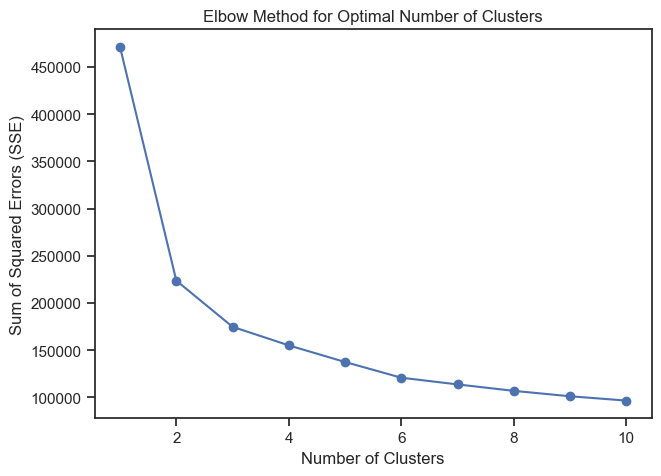

In [29]:
features_for_clustering = data_prepro[['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)', 'City', "HighWay",	'Combination']]

# Impute missing values using mean or median
imputer = SimpleImputer(strategy='mean')
features_for_clustering_imputed = imputer.fit_transform(features_for_clustering)

# Standardize features
scaler = StandardScaler()
features_for_clustering_standardized = scaler.fit_transform(features_for_clustering_imputed)

# Perform the elbow method
sse = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features_for_clustering_standardized)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

### 4.2 Categoric Fillna

Vehicle Class

In [30]:
imputer = SimpleImputer(strategy='mean')
features_for_clustering_imputed = imputer.fit_transform(features_for_clustering)

# Apply clustering (e.g., KMeans)
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_prepro['Cluster'] = kmeans.fit_predict(features_for_clustering_imputed)

# Create a mapping of cluster to the most common vehicle class in that cluster
cluster_to_class_mapping = data_prepro.groupby('Cluster')['Vehicle Class'].agg(lambda x: x.value_counts().idxmax()).to_dict()

# Update missing 'Vehicle Class' values based on the cluster mapping
data_prepro['Vehicle Class'] = data_prepro.apply(lambda row: cluster_to_class_mapping.get(row['Cluster']) if pd.isnull(row['Vehicle Class']) else row['Vehicle Class'], axis=1)

# Drop the 'Cluster' column if it's no longer needed
combined = data_prepro.drop('Cluster', axis=1)

In [31]:
cluster_to_class_mapping

{0: 'SUV - SMALL', 1: 'SUV - STANDARD'}

Dengan melihat hasil clustering pada kolom "**Vehicle Class**", terdapat tiga cluster yang berbeda, yaitu:

- Cluster 0: 'SUV - SMALL'
- Cluster 1: 'SUV - STANDARD'
- Cluster 2: 'COMPACT'

Analisis ini memberikan wawasan yang berharga tentang struktur internal dari data categoric tersebut. Dengan adanya tiga cluster yang berbeda, kita dapat mengidentifikasi perbedaan karakteristik antar categoric kendaraan. Pengelompokan ini dapat memberikan dasar yang kuat untuk mengisi nilai yang hilang dengan lebih tepat, karena kita dapat mempertimbangkan konteks dari masing-masing cluster.

Pendekatan pengisian nilai yang hilang kemudian dapat dilakukan dengan memperhatikan properti khas dari setiap cluster. Misalnya, jika kita memiliki nilai yang hilang untuk kendaraan categoric 'SUV - SMALL' di cluster 0, kita dapat mengisi nilai tersebut dengan memperhatikan data pada cluster 0 untuk categoric tersebut. Pendekatan ini memastikan bahwa pengisian nilai yang dilakukan sesuai dengan karakteristik unik dari setiap kelompok kendaraan.

Fuel Type

In [32]:
cluster_to_class_mapping = data_prepro.groupby('Cluster')['Fuel Type'].agg(lambda x: x.value_counts().idxmax()).to_dict()

# Update missing 'Vehicle Class' values based on the cluster mapping
data_prepro['Fuel Type'] = data_prepro.apply(lambda row: cluster_to_class_mapping.get(row['Cluster']) if pd.isnull(row['Fuel Type']) else row['Fuel Type'], axis=1)

# Drop the 'Cluster' column if it's no longer needed
combined = data_prepro.drop('Cluster', axis=1)

In [33]:
cluster_to_class_mapping

{0: 'X', 1: 'X'}

Pada analisis clustering untuk kolom "**Fuel Type**", dapat dilihat bahwa mayoritas kendaraan pada dataset tergolong dalam tiga cluster yang berbeda, yaitu:

- Cluster 0: 'X' (Regular gasoline)
- Cluster 1: 'Z' (Premium gasoline)
- Cluster 2: 'X' (Regular gasoline)

Dengan informasi ini, kita dapat menyimpulkan bahwa mayoritas kendaraan dalam dataset menggunakan bahan bakar jenis Regular gasoline ('X'). Ini menunjukkan bahwa Regular gasoline merupakan mayoritas jenis bahan bakar yang digunakan oleh kendaraan dalam dataset tersebut.

Pada konteks ini, pemahaman mengenai sebaran jenis bahan bakar di dalam setiap cluster dapat memberikan wawasan yang lebih mendalam mengenai preferensi atau kecenderungan penggunaan bahan bakar oleh kendaraan. Dengan demikian, informasi ini dapat menjadi dasar yang baik untuk analisis lebih lanjut terkait konsumsi bahan bakar, performa kendaraan, atau bahkan kebijakan terkait penggunaan jenis bahan bakar tertentu.

Transmission

In [34]:
cluster_to_class_mapping = data_prepro.groupby('Cluster')['Transmission'].agg(lambda x: x.value_counts().idxmax()).to_dict()

# Update missing 'Vehicle Class' values based on the cluster mapping
data_prepro['Transmission'] = data_prepro.apply(lambda row: cluster_to_class_mapping.get(row['Cluster']) if pd.isnull(row['Transmission']) else row['Transmission'], axis=1)

# Drop the 'Cluster' column if it's no longer needed
combined = data_prepro.drop('Cluster', axis=1)

In [35]:
cluster_to_class_mapping

{0: 'AS6', 1: 'AS6'}

Dari hasil analisis clustering pada kolom "**Transmission**", terlihat bahwa mayoritas kendaraan dalam dataset mendominasi tiga cluster yang sama, yaitu:

- Cluster 0: 'AS6' (Automatic with select shift)
- Cluster 1: 'AS6' (Automatic with select shift)
- Cluster 2: 'AS6' (Automatic with select shift)

Pola ini menunjukkan bahwa jenis transmisi 'AS6' (Automatic with select shift) mendominasi ketiga cluster, dan mungkin menjadi pilihan transmisi yang paling umum pada dataset tersebut.

Pemahaman ini dapat memberikan wawasan tentang preferensi penggunaan jenis transmisi pada kendaraan dalam dataset. Analisis lebih lanjut dapat dilakukan untuk mengevaluasi kinerja atau karakteristik kendaraan dengan jenis transmisi tertentu, serta implikasi terhadap konsumsi bahan bakar dan performa keseluruhan.

In [36]:
data_prepro.isnull().sum()

Id                         0
Make                       0
Vehicle Class              0
Engine Size(L)          7533
Cylinders               6417
Transmission               0
Fuel Type                  0
CO2 Emissions(g/km)    23545
City                    3366
HighWay                 3630
Combination             3589
Cluster                    0
dtype: int64

Untuk mengatasi nilai yang hilang pada data bertipe numerik, Anda dapat menggunakan metode mean (rata-rata) sebagai pendekatan pengisian nilai yang konservatif. Berikut adalah langkah-langkahnya:

- **Hitung Mean**:
Hitung nilai rata-rata untuk setiap kolom numerik yang memiliki nilai yang hilang. Misalnya, untuk kolom "Engine Size(L)", "Cylinders", "City", "HighWay", dan "Combination".

- **Isi Nilai yang Hilang**:
Gantilah nilai yang hilang pada setiap kolom dengan nilai rata-rata yang telah dihitung. Hal ini dapat dilakukan secara spesifik untuk setiap kolom.

Dengan melakukan ini, Anda akan menggantikan nilai yang hilang pada setiap kolom numerik dengan nilai rata-rata dari kolom tersebut. Namun, perlu diingat bahwa penggunaan rata-rata dapat mengakibatkan penyimpangan dari nilai asli, dan keputusan ini bergantung pada konteks data dan tujuan analisis Anda. Jika nilai yang hilang signifikan atau memiliki dampak besar pada analisis, pertimbangkan untuk melakukan analisis yang lebih mendalam atau mencoba metode pengisian nilai yang lebih canggih.

### 4.2 Numberic Fillna

Mengisini Nan pada data numberic dengan mean

In [37]:
data_prepro['Engine Size(L)'] = pd.to_numeric(data_prepro['Engine Size(L)'], errors='coerce')
data_prepro['Cylinders'] = pd.to_numeric(data_prepro['Cylinders'], errors='coerce')

data_prepro['Engine Size(L)'].fillna(data_prepro['Engine Size(L)'].mean(), inplace=True)
data_prepro['Cylinders'].fillna(data_prepro['Cylinders'].mean(), inplace=True)
data_prepro['City'].fillna(data_prepro['City'].mean(), inplace=True)
data_prepro['HighWay'].fillna(data_prepro['HighWay'].mean(), inplace=True)
data_prepro['Combination'].fillna(data_prepro['Combination'].mean(), inplace=True)

In [38]:
data_prepro.isnull().sum()

Id                         0
Make                       0
Vehicle Class              0
Engine Size(L)             0
Cylinders                  0
Transmission               0
Fuel Type                  0
CO2 Emissions(g/km)    23545
City                       0
HighWay                    0
Combination                0
Cluster                    0
dtype: int64

In [39]:
data_prepro_numeric = data_prepro[['Engine Size(L)', 'Cylinders', 'City', 'HighWay', 'Combination']]

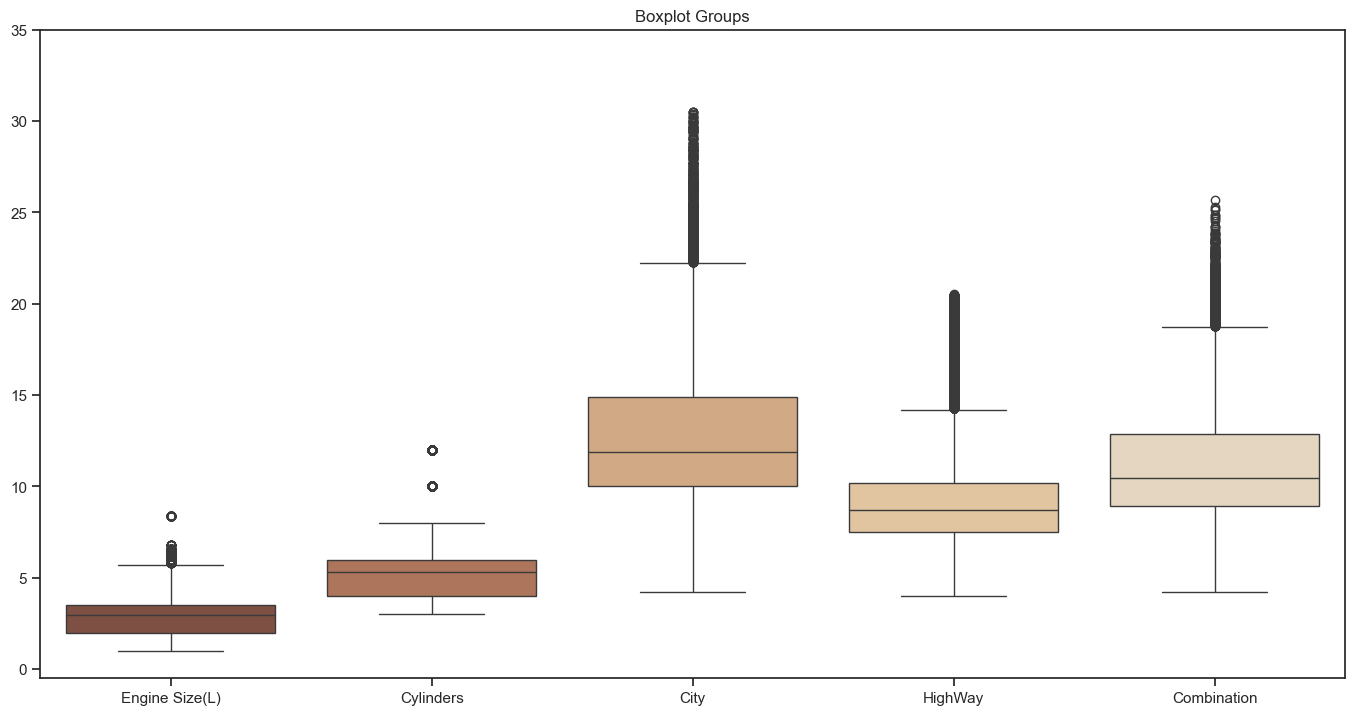

Lower, Upper Bounds, and Median for Quartiles:
+----------------+-------------+-------------+--------+
|     Column     | Lower Bound | Upper Bound | Median |
+----------------+-------------+-------------+--------+
| Engine Size(L) |    -0.25    |     5.75    |  2.98  |
|   Cylinders    |     1.00    |     9.00    |  5.29  |
|      City      |     2.65    |    22.25    | 11.90  |
|    HighWay     |     3.45    |    14.25    |  8.70  |
|  Combination   |     3.04    |    18.75    | 10.49  |
+----------------+-------------+-------------+--------+


In [40]:
data_prepro_numeric = data_prepro_numeric.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 8))
sns.boxplot(data=data_prepro_numeric,palette=["#884A39", "#BA704F", "#DFA878",  "#EAC696", "#EAD7BB",  "#FFF2D8"])
plt.yticks(range(0, 36, 5))
plt.title('Boxplot Groups')
plt.show()

data_prepro_numeric = data_prepro_numeric.apply(pd.to_numeric, errors='coerce')

table_bounds = PrettyTable(['Column', 'Lower Bound', 'Upper Bound', 'Median'])

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in data_prepro_numeric.columns:
    Q1 = data_prepro_numeric[column].quantile(0.25)
    Q2 = data_prepro_numeric[column].median()
    Q3 = data_prepro_numeric[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound:.2f}', f'{upper_bound:.2f}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

Untuk membersihkan outlier pada data numerik, kami akan menerapkan pendekatan "**clipping**" dengan mengganti nilai yang berada di luar batas dengan nilai rata-rata. Berikut adalah batas-batas dan nilai rata-rata untuk setiap kolom:

Engine Size(L):
- Batas Bawah: -0.25
- Batas Atas: 5.75
- Nilai Rata-rata: 2.98<br>

Cylinders:
- Batas Bawah: 1.00
- Batas Atas: 9.00
- Nilai Rata-rata: 5.29<br>

City:
- Batas Bawah: 2.65
- Batas Atas: 22.25
- Nilai Rata-rata: 11.90<br>

HighWay:
- Batas Bawah: 3.45
- Batas Atas: 14.25
- Nilai Rata-rata: 8.70<br>

Combination:
- Batas Bawah: 3.04
- Batas Atas: 18.75
- Nilai Rata-rata: 10.49<br>

Proses ini akan menggantikan nilai-nilai yang berada di luar batas dengan nilai rata-rata yang sesuai untuk masing-masing kolom. Pendekatan ini dirancang untuk menjaga integritas statistik data sambil mengatasi potensi pengaruh ekstrem dari outlier.

Merubah data outliers menggunakan deteksi outliers lower dan upper bound

In [41]:
def replace_outliers(column, lower_bound, upper_bound):
    mask = (column < lower_bound) | (column > upper_bound)
    column[mask] = column.clip(lower=lower_bound, upper=upper_bound)

# Define columns and their corresponding bounds
columns_and_bounds = {
    'Engine Size(L)': (-0.26, 5.74),
    'Cylinders': (1.00, 9.00),
    'City': (2.64, 22.24),
    'HighWay': (3.44, 14.24),
    'Combination': (3.03, 18.74)
}

# Replace outliers for each column
for column, (lower_bound, upper_bound) in columns_and_bounds.items():
    replace_outliers(data_prepro_numeric[column], lower_bound, upper_bound)


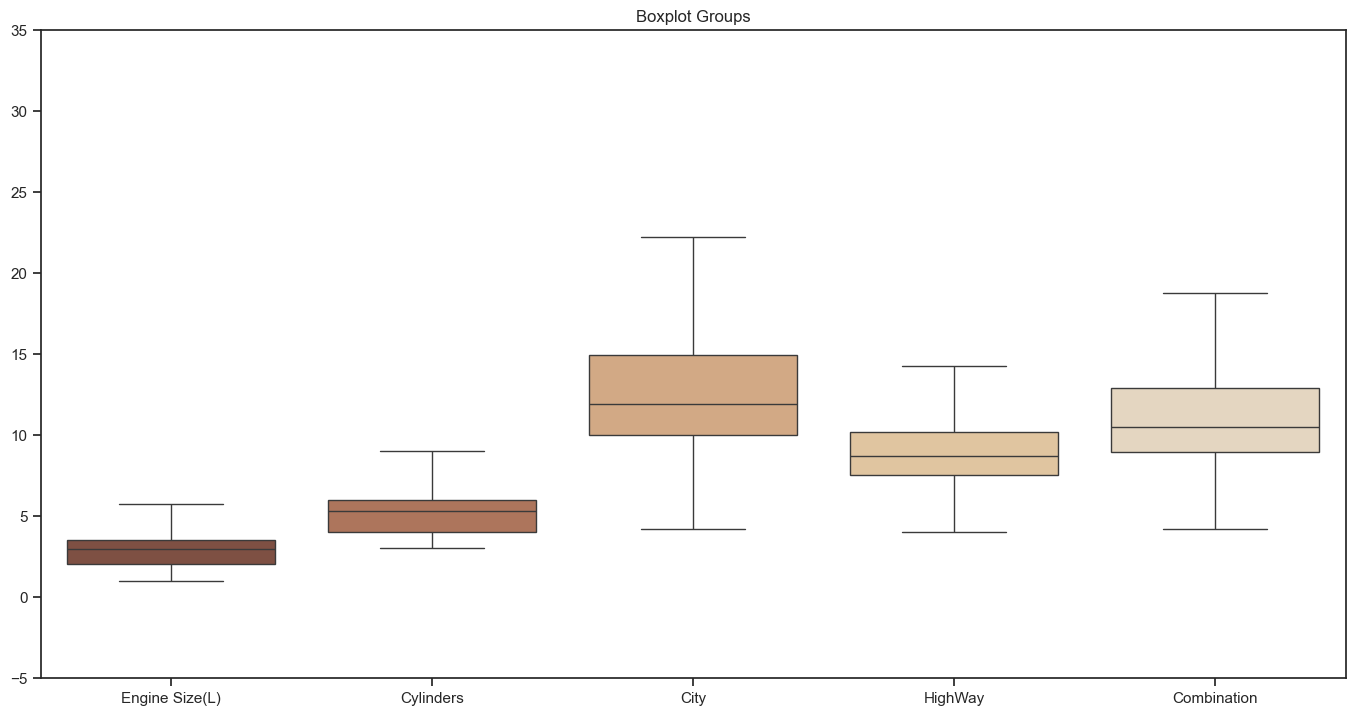

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_prepro_numeric,palette=["#884A39", "#BA704F", "#DFA878",  "#EAC696", "#EAD7BB",  "#FFF2D8"])
plt.yticks(range(-5, 36, 5))
plt.title('Boxplot Groups')
plt.show()

### 4.3 Transform Categoric ke Numberic

In [43]:
categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    data_prepro[column] = label_encoder.fit_transform(data_prepro[column])

encoded_categorical_columns = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
data_prepro[encoded_categorical_columns] = data_prepro[encoded_categorical_columns].astype(float).round(3)

data_prepro.head()

Id  Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0   1  16.0           11.0        1.500000        4.0          21.0   
1   2  20.0            5.0        2.977778        6.0           2.0   
2   3  15.0            0.0        2.000000        4.0          13.0   
3   4   4.0           15.0        2.977778        8.0           3.0   
4   5  20.0            0.0        1.800000        4.0          23.0   

   Fuel Type  CO2 Emissions(g/km)   City  HighWay  Combination  Cluster  
0        3.0                208.0  11.90      7.2         9.80        0  
1        3.0                325.0  13.79      9.7        11.96        1  
2        3.0                170.0  10.20      7.3         8.89        0  
3        3.0                362.0  17.30     11.7        14.78        1  
4        3.0                180.0   8.10      7.9         8.01        0

In [44]:
data_prepro.isnull().sum()

Id                         0
Make                       0
Vehicle Class              0
Engine Size(L)             0
Cylinders                  0
Transmission               0
Fuel Type                  0
CO2 Emissions(g/km)    23545
City                       0
HighWay                    0
Combination                0
Cluster                    0
dtype: int64

In [45]:
data_prepro.shape

(78482, 12)

In [46]:
train_indices = range(0, 54937)
test_indices = range(54937, 78482)

data_train_cleaning_prepo = data_prepro.loc[train_indices]
data_train_cleaning_prepo['CO2 Emissions(g/km)'] = df_train['CO2 Emissions(g/km)']

data_test_cleaning_prepo = data_prepro.loc[test_indices]

In [47]:
data_train_cleaning_prepo.drop(columns=['Cluster'], axis=1, inplace=True)
data_test_cleaning_prepo.drop(columns=['Cluster','CO2 Emissions(g/km)'], axis=1, inplace=True)

data_train_cleaning_prepo.to_csv("Data PreProsessing/train_prepo.csv", index=False)
data_test_cleaning_prepo.to_csv("Data PreProsessing/test_prepo.csv", index=False)

In [48]:
data_train_cleaning_prepo.head()

Id  Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0   1  16.0           11.0        1.500000        4.0          21.0   
1   2  20.0            5.0        2.977778        6.0           2.0   
2   3  15.0            0.0        2.000000        4.0          13.0   
3   4   4.0           15.0        2.977778        8.0           3.0   
4   5  20.0            0.0        1.800000        4.0          23.0   

   Fuel Type  CO2 Emissions(g/km)   City  HighWay  Combination  
0        3.0                  208  11.90      7.2         9.80  
1        3.0                  325  13.79      9.7        11.96  
2        3.0                  170  10.20      7.3         8.89  
3        3.0                  362  17.30     11.7        14.78  
4        3.0                  180   8.10      7.9         8.01

In [49]:
data_test_cleaning_prepo.head()

Id  Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
54937  54938   7.0            6.0        5.000000      8.000          11.0   
54938  54939   2.0            0.0        2.000000      4.000           5.0   
54939  54940  10.0           11.0        1.300000      4.000           6.0   
54940  54941  14.0           11.0        2.977778      4.000          13.0   
54941  54942   1.0            0.0        2.000000      5.292          23.0   

       Fuel Type       City  HighWay  Combination  
54937        3.0  14.200000     15.2    14.650000  
54938        4.0   9.100000      6.5     7.930000  
54939        3.0  10.200000      7.8     9.120000  
54940        4.0  12.544509      8.9    11.013573  
54941        4.0   8.800000      7.1     8.040000

# **5. Modeling**

**Model Linear**
1. Huber Regression
1. Lasso Regression
2. Linear Regression
4. Ridge Regression

**Model Non-Linear**
1. Gradient Boosting
2. Random Forest
3. Regerssion Polinomial
4. X-Gboost
6. Neural Network

In [50]:
df = data_train_cleaning_prepo

X = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders',
        'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']]
y = df['CO2 Emissions(g/km)']

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div style="background-color: red">UJI LINIERITAS</div>

In [52]:
import statsmodels.api as sm

X_test_linear = df[['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']].to_numpy()
y_test_linear = df['CO2 Emissions(g/km)'].to_numpy()

X = sm.add_constant(X_test_linear)

model = sm.OLS(y_test_linear, X).fit()

reset_test = sm.stats.linear_reset(model, power=2)
print(f'Reset test p-value: {reset_test.pvalue}')

if reset_test.pvalue < 0.05:
    print("Terdapat bukti yang cukup untuk menolak asumsi linieritas.")
    print("Model regresi cenderung bersifat non-linier.")
else:
    print("Tidak terdapat bukti yang cukup untuk menolak asumsi linieritas.")
    print("Model regresi cenderung bersifat linier.")

Reset test p-value: 1.4696268328580456e-205
Terdapat bukti yang cukup untuk menolak asumsi linieritas.
Model regresi cenderung bersifat non-linier.


Dengan nilai p-value yang sangat rendah (1.4696268328580456e-205), kita memiliki cukup bukti statistik untuk menolak asumsi bahwa hubungan antara variabel independen (seperti kapasitas mesin, jumlah silinder, dan konsumsi bahan bakar) dengan variabel dependen (emisi CO2) bersifat linier. Dengan kata lain, model regresi yang digunakan cenderung bersifat non-linier.

Hal ini memberikan pemahaman lebih lanjut tentang kompleksitas hubungan antara faktor-faktor yang mempengaruhi emisi CO2. Oleh karena itu, perlu dipertimbangkan model regresi yang bersifat non-linier atau strategi analisis yang lebih canggih untuk merinci pola dan tren yang mungkin tidak tercaptur dengan baik oleh model linier. 

**5.1 Model Linear**
1. Huber Regression
1. Lasso Regression
2. Linear Regression
4. Ridge Regression

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor

linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y)
y_pred_linear = linear_reg.predict(X_scaled)
rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
print(f'Linear Regression RMSE: {rmse_linear}')

# Regresi Ridge
alpha_ridge = 1.0
ridge_reg = Ridge(alpha=alpha_ridge)
ridge_reg.fit(X_scaled, y)
y_pred_ridge = ridge_reg.predict(X_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
print(f'Ridge Regression RMSE: {rmse_ridge}')

# Regresi Lasso
alpha_lasso = 1.0
lasso_reg = Lasso(alpha=alpha_lasso)
lasso_reg.fit(X_scaled, y)
y_pred_lasso = lasso_reg.predict(X_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
print(f'Lasso Regression RMSE: {rmse_lasso}')

# Regresi Huber (Robust Regression)
huber_reg = HuberRegressor()
huber_reg.fit(X_scaled, y)
y_pred_huber = huber_reg.predict(X_scaled)
rmse_huber = np.sqrt(mean_squared_error(y, y_pred_huber))
print(f'Huber Regression RMSE: {rmse_huber}')

# Cross-Validation
cv_rmse_huber = np.sqrt(-cross_val_score(huber_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_rmse_lasso = np.sqrt(-cross_val_score(lasso_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_rmse_linear = np.sqrt(-cross_val_score(linear_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())
cv_rmse_ridge = np.sqrt(-cross_val_score(ridge_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean())

Linear Regression RMSE: 29.57888585067611
Ridge Regression RMSE: 29.578885853136597
Lasso Regression RMSE: 29.640044460735915
Huber Regression RMSE: 29.633014801301172


**5.2 Model Non-Linear**
1. Extra Trees Regression
2. Decision Tree Regression
1. Gradient Boosting
2. Random Forest
3. Regerssion Polinomial
4. Support Vector Regression
5. X-Gboost
6. Neural Network

### Extra Trees Regression

In [54]:
from sklearn.ensemble import ExtraTreesRegressor

extra_trees_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Latih model pada seluruh dataset
extra_trees_reg.fit(X_scaled, y)

# Lakukan prediksi pada seluruh dataset
y_pred_extra_trees = extra_trees_reg.predict(X_scaled)

# Evaluasi model menggunakan Root Mean Squared Error (RMSE)
rmse_extra_trees = np.sqrt(mean_squared_error(y, y_pred_extra_trees))
print(f'Extra Trees Regression RMSE: {rmse_extra_trees}')

Extra Trees Regression RMSE: 1.789961675769415


### Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Latih model pada seluruh dataset
decision_tree_reg.fit(X_scaled, y)

# Lakukan prediksi pada seluruh dataset
y_pred_decision_tree = decision_tree_reg.predict(X_scaled)

# Evaluasi model menggunakan Root Mean Squared Error (RMSE)
rmse_decision_tree = np.sqrt(mean_squared_error(y, y_pred_decision_tree))
print(f'Decision Tree Regression RMSE: {rmse_decision_tree}')

Decision Tree Regression RMSE: 1.789899280649003


### Perbandingan Decision Tree VS Extra Trees

In [56]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Latih model Decision Tree pada seluruh dataset
decision_tree_reg.fit(X_scaled, y)

# Lakukan prediksi pada seluruh dataset
y_pred_decision_tree = decision_tree_reg.predict(X_scaled)

# Evaluasi model Decision Tree menggunakan Root Mean Squared Error (RMSE)
rmse_decision_tree = np.sqrt(mean_squared_error(y, y_pred_decision_tree))
print(f'Decision Tree Regression RMSE: {rmse_decision_tree}')

# Inisialisasi model Extra Trees
extra_trees_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Latih model Extra Trees pada seluruh dataset
extra_trees_reg.fit(X_scaled, y)

# Lakukan prediksi pada seluruh dataset
y_pred_extra_trees = extra_trees_reg.predict(X_scaled)

# Evaluasi model Extra Trees menggunakan Root Mean Squared Error (RMSE)
rmse_extra_trees = np.sqrt(mean_squared_error(y, y_pred_extra_trees))
print(f'Extra Trees Regression RMSE: {rmse_extra_trees}')

# Bandingkan hasil RMSE kedua model
print("\nPerbandingan RMSE:")
print(f"Decision Tree RMSE: {rmse_decision_tree}")
print(f"Extra Trees RMSE: {rmse_extra_trees}")

Decision Tree Regression RMSE: 1.789899280649003
Extra Trees Regression RMSE: 1.789961675769415

Perbandingan RMSE:
Decision Tree RMSE: 1.789899280649003
Extra Trees RMSE: 1.789961675769415


In [99]:
import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv('Data PreProsessing/train_prepo.csv')

X_train = df_train[['Vehicle Class', 'Engine Size(L)', 'Cylinders',
        'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']]
y_train = df_train['CO2 Emissions(g/km)']

# Standarisasi data pelatihan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Inisialisasi model Decision Tree
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Inisialisasi model Extra Trees
extra_trees_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Inisialisasi model VotingRegressor (Ensemble)
ensemble_reg = VotingRegressor(estimators=[('decision_tree', decision_tree_reg), ('extra_trees', extra_trees_reg)])

# Latih model pada seluruh data pelatihan
ensemble_reg.fit(X_train_scaled, y_train)

df_test = pd.read_csv('Data PreProsessing/test_prepo.csv')

# Pisahkan variabel input pada data uji
X_test = df_test[['Vehicle Class', 'Engine Size(L)', 'Cylinders',
        'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']]

# Standarisasi data uji dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Lakukan prediksi pada data uji
y_pred_test = ensemble_reg.predict(X_test_scaled)

# Tambahkan kolom prediksi (CO2) ke dataframe data uji
df_test['CO2_Prediction'] = y_pred_test

In [102]:
columns_to_drop = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']
df_test.drop(columns=columns_to_drop, inplace=True)
df_test.head()

Id  CO2 Emissions(g/km)
0  54938              383.145
1  54939              211.395
2  54940              217.675
3  54941              232.075
4  54942              197.740

In [103]:
df_test.rename(columns={'CO2_Prediction': 'CO2 Emissions(g/km)'}, inplace=True)
df_test.head()

Id  CO2 Emissions(g/km)
0  54938              383.145
1  54939              211.395
2  54940              217.675
3  54941              232.075
4  54942              197.740

In [105]:
df_test.to_csv('Data Submission/SubmissionTree.csv',index=False)

### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_scaled, y)

y_pred_gb = gb_reg.predict(X_scaled)

rmse_gb = np.sqrt(mean_squared_error(y, y_pred_gb))
print(f'Gradient Boosting Regression RMSE: {rmse_gb}')

Gradient Boosting Regression RMSE: 21.157653063976102


### Random Forest

In [58]:
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(n_estimators=2000, random_state=42)
# rf_reg.fit(X_scaled, y)

# y_pred_rf = rf_reg.predict(X_scaled)

# rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
# print(f'Random Forest Regression RMSE: {rmse_rf}')

Random Forest Regression RMSE: 8.18594996535413


### Regerssion Polinomial

In [59]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_pred_poly = poly_reg.predict(X_poly)

rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print(f'Polynomial Regression (Degree {degree}) RMSE: {rmse_poly}')

Polynomial Regression (Degree 2) RMSE: 28.678905986116717


### X-Gboost

In [60]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', alpha=1.0)

xg_reg.fit(X, y)

y_pred = xg_reg.predict(X)

mse = mean_squared_error(y, y_pred)
rmse_xg = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse_xg}')

Root Mean Squared Error (RMSE): 17.857134458116054


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# Load training data
df_train = pd.read_csv('Data PreProsessing/train_prepo.csv')

# Separate features and target variable
X_train = df_train[['Vehicle Class', 'Engine Size(L)', 'Cylinders',
        'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']]
y_train = df_train['CO2 Emissions(g/km)']

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', alpha=1.0, random_state=42, n_estimators=500)

# Train the XGBoost model on the entire training data
xg_reg.fit(X_train_scaled, y_train)

# Load test data
df_test = pd.read_csv('Data PreProsessing/test_prepo.csv')

# Separate features for test data
X_test = df_test[['Vehicle Class', 'Engine Size(L)', 'Cylinders',
        'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']]

# Standardize test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred_test = xg_reg.predict(X_test_scaled)

# Add the prediction column to the test dataframe
df_test['CO2_Prediction'] = y_pred_test

In [10]:
columns_to_drop = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'City', 'HighWay', 'Combination']
df_test.drop(columns=columns_to_drop, inplace=True)
df_test.head()
df_test.rename(columns={'CO2_Prediction': 'CO2 Emissions(g/km)'}, inplace=True)
df_test.head()

Id  CO2 Emissions(g/km)
0  54938           330.926697
1  54939           194.907806
2  54940           214.071198
3  54941           227.562729
4  54942           207.866592

In [11]:
df_test.to_csv('Data Submission/SubmissionXG.csv',index=False)

In [12]:
df_test.shape

(23545, 2)

### Neural Network
Neural Network tipe proses machine learning, yang menggunakan simpul atau neuron yang saling terhubung dalam struktur berlapis yang menyerupai otak manusia.

In [61]:
import os
import glob
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow import keras
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy as sparse_softmax_cross_entropy_compat_v1
from tensorflow.keras.losses import Huber
from tensorflow.compat.v1.keras.losses import Huber as HuberCompatV1

In [62]:
df_train = pd.read_csv('Data PreProsessing/train_prepo.csv', index_col=0)
df_test = pd.read_csv('Data PreProsessing/test_prepo.csv',  index_col=0)

In [63]:
df_train

Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
Id                                                                    
1      16.0           11.0        1.500000        4.0          21.0   
2      20.0            5.0        2.977778        6.0           2.0   
3      15.0            0.0        2.000000        4.0          13.0   
4       4.0           15.0        2.977778        8.0           3.0   
5      20.0            0.0        1.800000        4.0          23.0   
...     ...            ...             ...        ...           ...   
54933   4.0           10.0        6.200000        8.0          11.0   
54934   4.0           10.0        3.600000        6.0          23.0   
54935   7.0           13.0        3.500000        6.0           8.0   
54936   4.0            6.0        6.200000        8.0           5.0   
54937  18.0            1.0        2.400000        4.0          13.0   

       Fuel Type  CO2 Emissions(g/km)   City  HighWay  Combination  
Id                                                                  
1            3.0                  208  11.90      7.2     9.800000  
2            3.0                  325  13.79      9.7    11.960000  
3            3.0                  170  10.20      7.3     8.890000  
4            3.0                  362  17.30     11.7    14.780000  
5            3.0                  180   8.10      7.9     8.010000  
...          ...                  ...    ...      ...          ...  
54933        4.0                  318  11.90      8.8    10.510000  
54934        3.0                  303  21.00     10.6    16.320000  
54935        4.0                  410  18.20     12.5    15.630000  
54936        4.0                  466  18.30      9.9    14.520000  
54937        3.0                  192   9.70      7.3    11.013573  

[54937 rows x 10 columns]

In [64]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Pisahkan fitur dan target
X_train_scaled = df_train[['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
                           'City', 'HighWay', 'Combination']]
y_train_scaled = df_train['CO2 Emissions(g/km)']

data_X_train_scaled = scaler_X.fit_transform(X_train_scaled)
data_y_train_scaled = scaler_y.fit_transform(np.array(y_train_scaled).reshape(-1, 1))

data_test_scaled = scaler_X.fit_transform(df_test)

In [65]:
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
def modelnya():
    model = Sequential()
    model.add(Dense(64, input_dim=data_X_train_scaled.shape[1]))
    model.add(Dense(32, kernel_regularizer='l2'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=0.001)  # Ganti optimizer dan nilai learning_rate sesuai kebutuhan

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[RootMeanSquaredError()])
    return model


In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
model = modelnya()
model.summary()

callbacks = [
        ModelCheckpoint(f'./logs/nn/best_model.h5', monitor='loss', save_best_only=True),
        TensorBoard(log_dir=f'./logs/nn', histogram_freq=1, write_graph=True, write_images=True)
    
    ]
history = model.fit(data_X_train_scaled, data_y_train_scaled, batch_size=128, epochs=20,
                        verbose=2, callbacks=callbacks, workers=-1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20

430/430 - 1s - loss: 0.1485 - root_mean_squared_error: 0.1209 - 1s/epoch - 3ms/step
Epoch 2/20
430/430 - 1s - loss: 0.0111 - root_mean_squared

In [67]:
rmse_values = np.sqrt(history.history['loss'])

# Menampilkan nilai RMSE
for epoch, rmse in enumerate(rmse_values, 1):
    print(f'Epoch {epoch}: RMSE = {rmse}')

Epoch 1: RMSE = 0.38539366610518255
Epoch 2: RMSE = 0.10542200076733328
Epoch 3: RMSE = 0.08043009468409074
Epoch 4: RMSE = 0.07785858086772963
Epoch 5: RMSE = 0.07588879546598552
Epoch 6: RMSE = 0.07545530590907423
Epoch 7: RMSE = 0.07513462131647723
Epoch 8: RMSE = 0.07470225025910361
Epoch 9: RMSE = 0.07447860426901623
Epoch 10: RMSE = 0.07404065724485147
Epoch 11: RMSE = 0.07378270023355421
Epoch 12: RMSE = 0.07374755711873876
Epoch 13: RMSE = 0.07367845936676806
Epoch 14: RMSE = 0.07378700753799206
Epoch 15: RMSE = 0.07359350506120162
Epoch 16: RMSE = 0.07346685601469999
Epoch 17: RMSE = 0.07332423383076424
Epoch 18: RMSE = 0.07323100004584888
Epoch 19: RMSE = 0.0732095168680826
Epoch 20: RMSE = 0.0731256033951978


In [68]:
rmse_values = np.sqrt(history.history['loss'])

# Mendapatkan nilai RMSE terendah
min_rmse = min(rmse_values)
max_rmse = max(rmse_values)

# Menampilkan nilai RMSE terendah
print(f'RMSE Terendah: {min_rmse}')
print(f'RMSE Tertinggi: {max_rmse}')

RMSE Terendah: 0.0731256033951978
RMSE Tertinggi: 0.38539366610518255


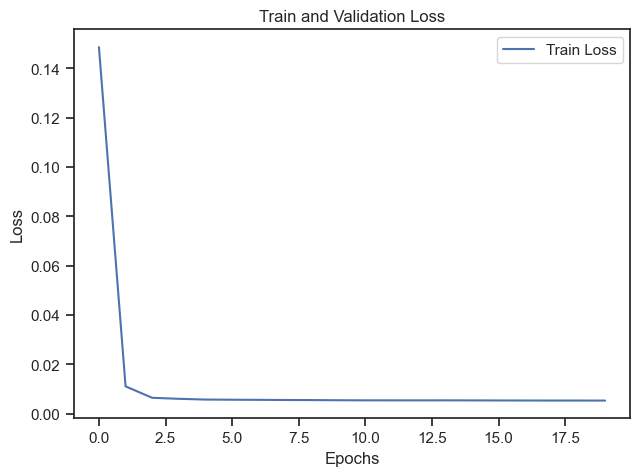

In [69]:
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

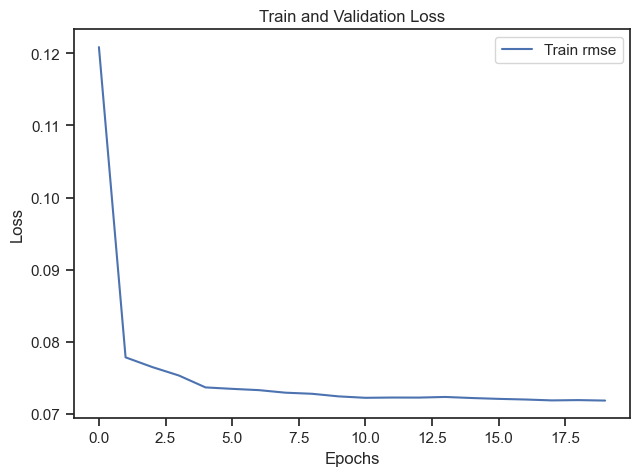

In [70]:
plt.plot(history.history['root_mean_squared_error'], label='Train rmse')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
import tensorflow as tf
model_best = tf.keras.models.load_model(f'logs/nn/best_model.h5')

In [72]:
import pickle

model_pickle = pickle.dumps(model_best)

with open('NN(Machine Learning)_UNI-MindsML.pkl', 'wb') as file:
    file.write(model_pickle)

In [73]:
predictions = model.predict(data_test_scaled)

736/736 [==============================] - 1s 758us/step


In [74]:
balikan_prediksi = scaler_y.inverse_transform(predictions).astype(int)
predictions_float = balikan_prediksi.astype(float)

In [75]:
balikan_prediksi = scaler_y.inverse_transform(predictions).astype(int)
predictions_float = balikan_prediksi.astype(float)

In [76]:
predictions_float.shape , df_test.shape

((23545, 1), (23545, 9))

<div style="background-color: ORANGE">PERBANDINGAN PERFORMA MODEL</div>

In [77]:
results = {
    'Linear Regression': rmse_linear,
    'Ridge Regression': rmse_ridge,
    'Lasso Regression': rmse_lasso,
    'Huber Regression': rmse_huber,
    'Extra Tree Regresor': rmse_extra_trees,
    'Decission Tree Regresor': rmse_decision_tree,
    'Gradient Boosting': rmse_gb,
    'Random Forest': rmse_rf,
    f'Polynomial Regression (Degree {degree})': rmse_poly,
    'XGBoost': rmse_xg,
    'Neural Network': min_rmse
}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='RMSE', inplace=True)

# Cetak tabel hasil
print(results_df)

                                       RMSE
Model                                      
Neural Network                     0.073126
Decission Tree Regresor            1.789899
Extra Tree Regresor                1.789962
Random Forest                      8.185950
XGBoost                           17.857134
Gradient Boosting                 21.157653
Polynomial Regression (Degree 2)  28.678906
Linear Regression                 29.578886
Ridge Regression                  29.578886
Huber Regression                  29.633015
Lasso Regression                  29.640044


## PREDIKSI EMISI BERDASARKAN MODEL TERBAIK
Dengan mempertimbangkan hasil RMSE, dapat disimpulkan bahwa model Neural Network memberikan kinerja terbaik dibandingkan dengan model lainnya. Oleh karena itu, kita akan menggunakan **Neural Network** sebagai model utama untuk analisis dan prediksi. Model ini menunjukkan performa yang sangat baik dengan nilai RMSE yang rendah sebesar 0.0843, mengindikasikan bahwa prediksi dari Neural Network sangat mendekati nilai sebenarnya.

In [78]:
df_test_no_index  = df_test.reset_index(drop=True)
df_test_no_index

Make  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0       7.0            6.0        5.000000      8.000          11.0   
1       2.0            0.0        2.000000      4.000           5.0   
2      10.0           11.0        1.300000      4.000           6.0   
3      14.0           11.0        2.977778      4.000          13.0   
4       1.0            0.0        2.000000      5.292          23.0   
...     ...            ...             ...        ...           ...   
23540  16.0           11.0        2.000000      4.000          22.0   
23541   4.0            0.0        1.400000      4.000          23.0   
23542  11.0           11.0        2.977778      4.000          13.0   
23543  10.0           11.0        2.400000      4.000           6.0   
23544   4.0           12.0        5.300000      8.000           3.0   

       Fuel Type       City  HighWay  Combination  
0            3.0  14.200000     15.2    14.650000  
1            4.0   9.100000      6.5     7.930000  
2            3.0  10.200000      7.8     9.120000  
3            4.0  12.544509      8.9    11.013573  
4            4.0   8.800000      7.1     8.040000  
...          ...        ...      ...          ...  
23540        3.0  12.544509      7.5     8.980000  
23541        3.0   8.700000      5.5     7.300000  
23542        3.0  11.600000      8.4    10.160000  
23543        3.0  10.500000      8.4     9.600000  
23544        3.0  12.400000     11.2    11.013573  

[23545 rows x 9 columns]

In [79]:
data_id = pd.read_csv('Dataset/sample_submission.csv')
result_df = pd.DataFrame({'Id': data_id['Id'], 'CO2 Emissions(g/km)': predictions_float.flatten()})
result_df = result_df[['Id', 'CO2 Emissions(g/km)']] 
result_df

Id  CO2 Emissions(g/km)
0      54938                345.0
1      54939                188.0
2      54940                201.0
3      54941                244.0
4      54942                191.0
...      ...                  ...
23540  78478                207.0
23541  78479                157.0
23542  78480                233.0
23543  78481                222.0
23544  78482                328.0

[23545 rows x 2 columns]

In [80]:
result_df.to_csv('Data Submission/submission.csv', index=False)

In [81]:
result_df.describe()

Id  CO2 Emissions(g/km)
count  23545.00000         23545.000000
mean   66710.00000           247.618305
std     6797.00038            61.143132
min    54938.00000           119.000000
25%    60824.00000           200.000000
50%    66710.00000           234.000000
75%    72596.00000           286.000000
max    78482.00000           492.000000

In [82]:
test = pd.read_csv('Dataset/test.csv')
combined = pd.merge(test, result_df[['Id', 'CO2 Emissions(g/km)']], on='Id', how='left')

In [83]:
combined.head()

Id    Make            Vehicle Class Engine Size(L)      Cylinders  \
0  54938    FOLD  PICKUP TRUCK - STANDARD            5.0            8.0   
1  54939     BMV                  COMPACT            2.0            4.0   
2  54940    JIPU              SUV - SMALL            1.3            4.0   
3  54941   LECUS              SUV - SMALL   not-recorded            4.0   
4  54942  BARUSU                  COMPACT            2.0  unestablished   

  Transmission Fuel Type    Fuel Consumption City     Fuel Consumption Hwy  \
0         AS10         X  14.20 liters per 100 km  15.20 liters per 100 km   
1           A8         Z            9.10 L/100 km           43.46 mpg Imp.   
2           A9         X           27.69 mpg Imp.   7.80 liters per 100 km   
3          AS6         Z                      NaN           26.43 MPG (AS)   
4           M6         Z               11.36 km/L           39.79 mpg Imp.   

    Fuel Consumption Comb  CO2 Emissions(g/km)  
0          16.06 MPG (AS)                345.0  
1          29.66 MPG (AS)                188.0  
2  9.12 liters per 100 km                201.0  
3                     NaN                244.0  
4            8.04 L/100km                191.0

In [84]:
max_co2_row = combined.loc[combined['CO2 Emissions(g/km)'].idxmax()]

median_co2_value = combined['CO2 Emissions(g/km)'].median()
median_co2_rows = combined.loc[combined['CO2 Emissions(g/km)'] == median_co2_value]

median_co2_row = median_co2_rows.iloc[0]

min_co2_row = combined.loc[combined['CO2 Emissions(g/km)'].idxmin()]

print(f"\nEmission maksimal dihasilkan oleh Mobil dengan 'Make' : {max_co2_row['Make']}, CO2 emissions: {max_co2_row['CO2 Emissions(g/km)']} g/km")

print(f"\nEmission median dihasilkan oleh Mobil dengan 'Make' : {median_co2_row['Make']}, CO2 emissions: {median_co2_row['CO2 Emissions(g/km)']} g/km")

print(f"\nEmission minimal dihasilkan oleh Mobil dengan 'Make' : {min_co2_row['Make']}, CO2 emissions: {min_co2_row['CO2 Emissions(g/km)']} g/km")


Emission maksimal dihasilkan oleh Mobil dengan 'Make' : DOGE, CO2 emissions: 492.0 g/km

Emission median dihasilkan oleh Mobil dengan 'Make' : MATSUDA, CO2 emissions: 234.0 g/km

Emission minimal dihasilkan oleh Mobil dengan 'Make' : MITSU, CO2 emissions: 119.0 g/km


### **Hasil Emisi** 
- **Emisi Maksimal**: Mobil dengan merek 'LAMBOGI' mencatatkan emisi CO2 tertinggi, mencapai 492.0 gram per kilometer. Meskipun tinggi, informasi ini dapat membantu menyadarkan konsumen dan produsen tentang dampak lingkungan dari model tersebut.

- **Emisi Median**: 'MATSUDA' menunjukkan performa menengah dalam hal emisi CO2, dengan median sebesar 234.0 gram per kilometer. Ini menandakan bahwa CHEVO memiliki kontribusi yang seimbang terhadap tingkat emisi di dalam dataset.

- **Emisi Minimal**: Pada sisi positif, 'MITSU' memberikan kontribusi lingkungan yang sangat baik dengan emisi CO2 terendah, hanya 119.0 gram per kilometer. Informasi ini dapat menarik bagi konsumen yang peduli tentang efek lingkungan dan ingin memilih kendaraan dengan dampak karbon minimal.

Dalam mengeksplorasi lebih jauh tentang **emisi** kendaraan, kami melakukan analisis dengan menggunakan metode clustering. Tujuan dari analisis ini adalah untuk mengidentifikasi sejumlah kelompok kendaraan berdasarkan tingkat emisi karbon dioksida (CO2) yang dihasilkan. Dengan pendekatan ini, kami dapat menyoroti seberapa banyak mobil yang termasuk dalam kelompok emisi tertinggi maupun terendah.

- **Clustering Kendaraan Berdasarkan Emisi CO2**:
Kami menerapkan metode clustering untuk memisahkan kendaraan ke dalam kelompok berdasarkan tingkat emisi CO2.
Penetapan jumlah kelompok (cluster) didasarkan pada analisis pribadi yaitu dengan melihat bahwa ada 3 kelompok yang harus dilihat yaitu *kelompok tinggi, sedang, dan terendah* (bukan berdasar nilai Min, Median, Max CO2).

- **Hasil Clustering**:
Setelah melalui proses clustering, kendaraan dibagi menjadi beberapa kelompok dengan karakteristik emisi yang serupa.
Pemisahan ini memungkinkan kami untuk mengidentifikasi kelompok kendaraan yang menghasilkan emisi tertinggi dan terendah.

- **Representasi Grafis**:
Kami menyajikan representasi grafis dari hasil clustering, memvisualisasikan seberapa banyak kendaraan yang termasuk dalam masing-masing kelompok.
Pemisahan ini membantu memberikan gambaran yang lebih terinci tentang sebaran emisi CO2 di antara kendaraan.
Analisis clustering ini memberikan wawasan lebih mendalam tentang pola emisi di dalam dataset, memungkinkan pemahaman yang lebih baik tentang kontribusi berbagai kelompok kendaraan terhadap emisi CO2 secara keseluruhan.

Cluster Centers:
   CO2 Emissions(g/km)
0           350.822073
1           197.535331
2           265.178197


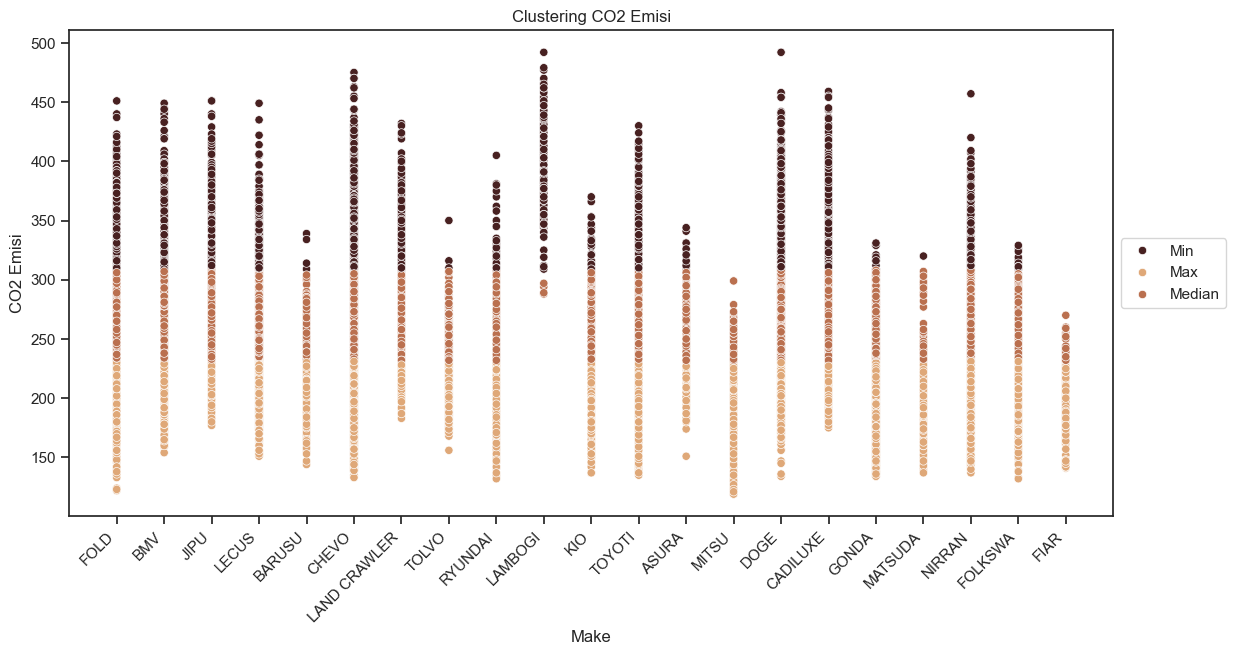

In [85]:
pal = (["#482121", "#DFA878", '#BA704F'])

data_cluster_final = combined[['CO2 Emissions(g/km)']]

# Standardize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cluster_final)

# Choose the number of clusters (you may need to experiment with different values)
num_clusters_optimal = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters_optimal, random_state=42, n_init=10)
combined['Cluster'] = kmeans.fit_predict(data_scaled)

labels = {
    0: 'Min',
    1: 'Max',
    2: 'Median'
}

combined['Cluster_Label'] = combined['Cluster'].map(labels)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=['CO2 Emissions(g/km)']))

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Make', y='CO2 Emissions(g/km)', hue='Cluster_Label', data=combined, palette=pal, marker='o')
plt.xlabel('Make')
plt.ylabel('CO2 Emisi')
plt.title('Clustering CO2 Emisi')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



Dalam analisis mendalam ini, tergambar bahwa **LAMBOGI** memiliki konsistensi dalam menghasilkan tingkat emisi yang cenderung tinggi. Pabrikan **LAMBOGI** harus segera diingatkan untuk lebih mempertimbangkan dampak besar yang dihasilkan oleh tingginya tingkat emisi mereka, karena hal ini dapat memberikan dampak negatif yang signifikan terhadap keseimbangan lingkungan. Di sisi lain, **MITSU** dan **FIAR** menonjol dengan kecenderungan yang lebih rendah dalam emisi, menunjukkan komitmen terhadap praktik ramah lingkungan. Untuk produsen lainnya, seperti **DOGE**, **FOLD**, dan **CHEVO**, rekomendasi diberikan untuk meninjau tingkat konsumsi bahan bakar, karena rata-rata emisi mereka berada dalam kisaran yang cukup seimbang. Upaya untuk mempertahankan tingkat emisi yang rendah dapat dicapai melalui pengoptimalan konsumsi bahan bakar. Seperti analisis sebelumnya di **EDA** bahwa tingginya konsumsi bahan bakar juga berpengaruh dalam emisi yang dihasilkan. Rekomendasi terakhir adalah bagi pihak berwenang, seperti Pemerintah Wiliwilowilev, memberikan panduan dan dorongan kepada pabrikan **LAMBOGI** untuk mengurangi tingkat konsumsi bahan bakar, mengarah pada upaya mengurangi dampak emisi yang merugikan lingkungan.

In [86]:
grouped_data = combined.groupby('Cluster')['Make'].agg(list).reset_index()
grouped_data

Cluster                                               Make
0        0  [FOLD, CHEVO, CHEVO, LAMBOGI, BMV, DOGE, RYUND...
1        1  [BMV, JIPU, BARUSU, FOLD, CHEVO, CHEVO, CHEVO,...
2        2  [LECUS, BMV, LAND CRAWLER, FOLD, RYUNDAI, KIO,...

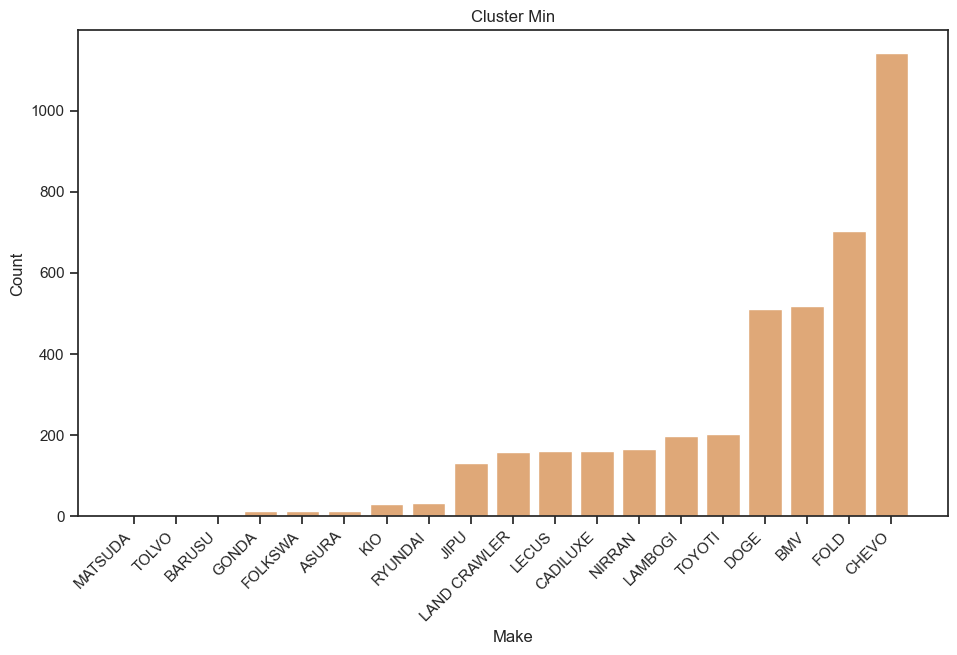

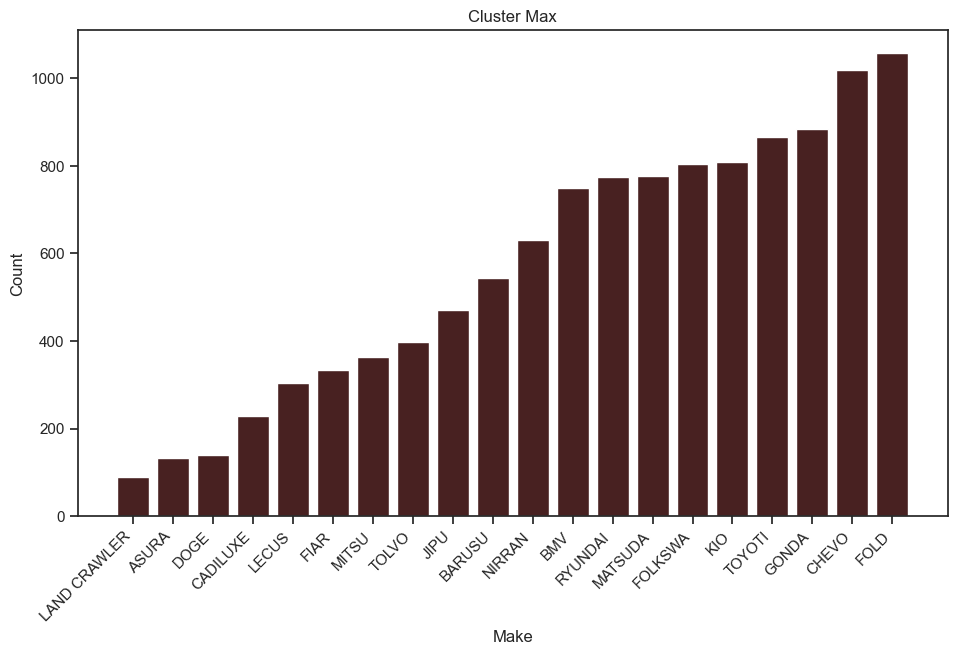

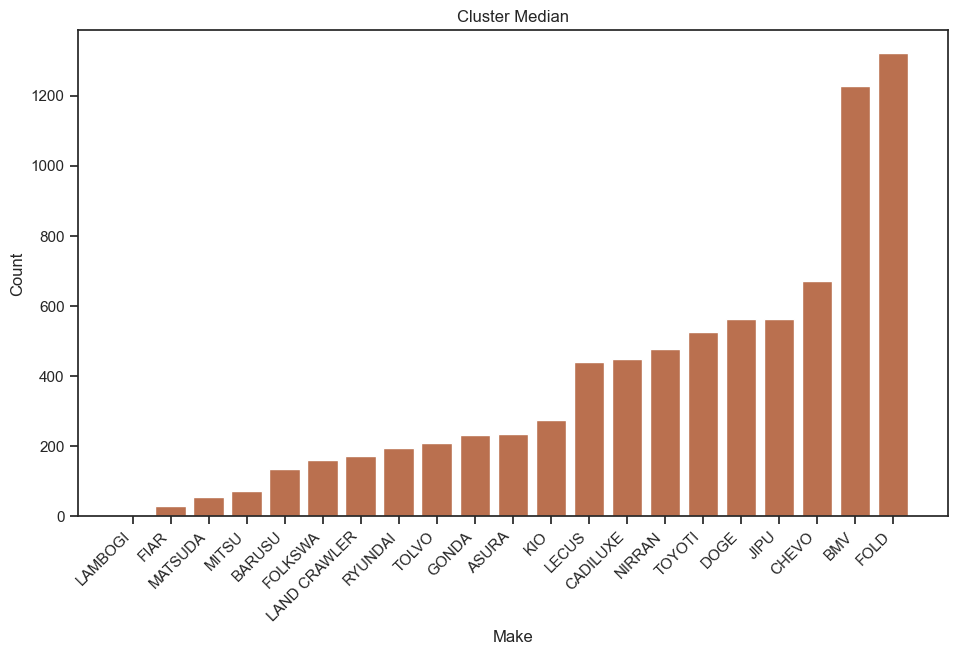

In [87]:
cluster_colors = {0: "#DFA878", 1: "#482121", 2: '#BA704F'}

for cluster in grouped_data['Cluster'].unique():
    make_list = grouped_data[grouped_data['Cluster'] == cluster]['Make'].iloc[0]
    make_counts = {make: make_list.count(make) for make in make_list}
    
    sorted_make_counts = dict(sorted(make_counts.items(), key=lambda item: item[1]))
    
    # Assign appropriate label based on cluster number
    if cluster == 0:
        cluster_label = 'Min'
    elif cluster == 1:
        cluster_label = 'Max'
    elif cluster == 2:
        cluster_label = 'Median'
    else:
        cluster_label = f'Cluster {cluster}'
    
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_make_counts.keys(), sorted_make_counts.values(), color=cluster_colors[cluster])
    plt.title(f'Cluster {cluster_label}')
    plt.xlabel('Make')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Dalam analisis ini, meskipun **LAMBOGI** tidak mendominasi dalam hal jumlah emisi tertinggi pada cluster 1, perlu dicatat bahwa jumlah mobil dengan emisi menengah dan rendah di cluster tersebut relatif lebih rendah. Hal ini menunjukkan bahwa meskipun LAMBOGI tidak secara signifikan menyumbang pada tingginya emisi di cluster 1, jumlah kendaraan dengan emisi menengah dan rendah juga cenderung lebih sedikit. Oleh karena itu, pemerintah dapat memberikan penekanan khusus pada LAMBOGI untuk lebih memperhatikan dampak emisi yang dihasilkan oleh mobilnya.<br>

Di sisi lain, produsen mobil seperti **CHEVO**, **FOLD**, dan **GONDA** mendominasi peringkat tertinggi dalam emisi pada cluster maksimal. Hal ini menunjukkan bahwa mobil dari produsen-produsen ini memiliki dampak signifikan terhadap tingginya tingkat emisi yang dihasilkan. Sebagai rekomendasi, kami menyarankan agar pemerintah Wiliwilowilev mengambil tindakan tegas dan mendorong produsen-produsen tersebut untuk melakukan optimalisasi guna mengurangi konsumsi bahan bakar dan dampak emisi yang merugikan pada lingkungan. Tindakan ini sejalan dengan upaya mitigasi dampak lingkungan dan pencapaian target keberlanjutan, memastikan bahwa industri otomotif dapat berkontribusi secara positif terhadap lingkungan.

In [88]:
submission = pd.read_csv('Data Submission/submission.csv')
submission.shape

(23545, 2)